# Predict the Strength of Concrete

**Data Description:**

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

**Context:**
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

**Attribute Information:**
1. Cement : measured in kg in a m3 mixture
2. Blast : measured in kg in a m3 mixture
3. Fly ash : measured in kg in a m3 mixture
4. Water : measured in kg in a m3 mixture
5. Superplasticizer : measured in kg in a m3 mixture
6. Coarse Aggregate : measured in kg in a m3 mixture
7. Fine Aggregate : measured in kg in a m3 mixture
8. Age : day (1~365)
9. Concrete compressive strength measured in MPa

**Objective:**

Modeling of strength of high performance concrete using Machine Learning

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas_profiling
from scipy.stats import zscore
import scipy.stats as stats
from scipy.stats import randint as sp_randint
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

from sklearn import svm, metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [2]:
# Import the dataset

df1 = pd.read_csv('concrete.csv')

## Exploratory Data Analysis

In [3]:
#Fetches top 5 rows
df1.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

    * All the features are continuous.
    * From few rows, its visible that Zero's are present in few columns.

In [4]:
# Identify the number of rows and columns
df1.shape

(1030, 9)

    * Dataset has 9 columns and 1030 rows

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


    * Missing values are not present. All the features has 1030 rows.
    * Except age, all other features have the datatype float.

In [6]:
# Check whether identical rows are present

dups = df1[df1.duplicated()]
dups

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
278   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
298   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
400   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
420   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
463   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
468   252.0    0.0  0.0  185.0           0.0     1111.0    784.0   28   
482   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91   
493   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
517   425.0  106.3  0.0  153.5          16.5      852.1    887.1   56   
525   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
527   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91   
576   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
577   425.0  106.3  0.0  153.5          16.5      852.1    887.1   28   
604   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
733   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
738   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
766   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
830   425.0  106.3  0.0  153.5          16.5      852.1    887.1    7   
880   425.0  106.3  0.0  153.5          16.5      852.1    887.1   56   
884   425.0  106.3  0.0  153.5          16.5      852.1    887.1    7   
892   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
933   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
943   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
967   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
992   425.0  106.3  0.0  153.5          16.5      852.1    887.1   28   

     strength  
278     33.40  
298     33.40  
400     35.30  
420     35.30  
463     77.30  
468     19.69  
482     65.20  
493     79.30  
517     64.30  
525     71.30  
527     65.20  
576     55.90  
577     60.29  
604     77.30  
733     79.30  
738     71.30  
766     79.30  
830     49.20  
880     64.30  
884     49.20  
892     77.30  
933     55.90  
943     35.30  
967     71.30  
992     60.29

    * Identical data points are present in the dataset. These rows are not going to be removed since there is a difference 
    in strength, age etc. 

In [7]:
# five point summary

df1.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

**Observations -**

    * Data looks reasonable.
    * Mean and Median are close for features cement, water, superplastic, coarseagg, fineagg and strength.
    * Mean is greater than Median for features slag, ash and age. Data is right skewed for these columns.

In [8]:
print('Skewness of cement       : ', df1["cement"].skew())
print('Skewness of slag         : ', df1["slag"].skew())
print('Skewness of ash          : ', df1["ash"].skew())
print('Skewness of water        : ', df1["water"].skew())
print('Skewness of superplastic : ', df1["superplastic"].skew())
print('Skewness of coarseagg    : ', df1["coarseagg"].skew())
print('Skewness of fineagg      : ', df1["fineagg"].skew())
print('Skewness of age          : ', df1["age"].skew())
print('Skewness of strength     : ', df1["strength"].skew())

Skewness of cement       :  0.5094811788717731
Skewness of slag         :  0.8007168956061774
Skewness of ash          :  0.5373539058066844
Skewness of water        :  0.07462838428549402
Skewness of superplastic :  0.9072025748672466
Skewness of coarseagg    :  -0.04021974481106704
Skewness of fineagg      :  -0.25300959769707143
Skewness of age          :  3.2691774006345895
Skewness of strength     :  0.41697728841071807


In [344]:
# Count of Nulls in the dataset
df1.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

**NaN(missing values) values are not present in any features**

In [10]:
# get the profile report of the dataset.

pandas_profiling.ProfileReport(df1)

**Note -**
    
    * Feature slag has 471 zero's.
    * Feature ash has 566 zero's.
    * Feature superplastinc has 379 zero's.
    * Dataset has 25 identical rows.
    * Correlation matrix shows there is a significant correlation between few features.

### Univariate Analysis

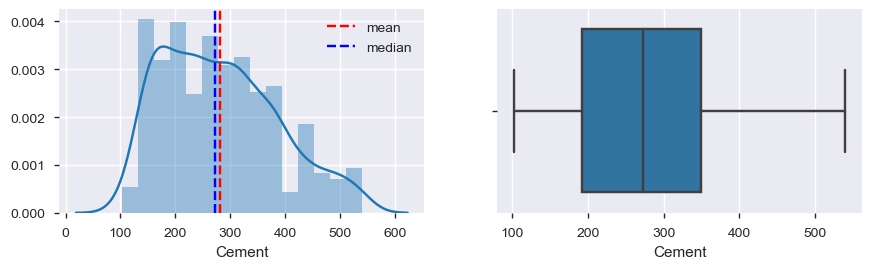

Count of missing values in Cement is 0
Range of Values in Cement are from 102.0 to 540.0
Mean, Median and Std dev for Cement are 281.17, 272.9 and 104.51 respectively
First Quartile, Third Quartile and IQR are 192.38, 350.0 and 157.62 respectively


In [11]:
# Hist and Box plot for feature cement

plt.figure(figsize = (16,9))
plt.subplot(3,3,1)
sns.distplot(df1.cement)
plt.axvline(df1['cement'].mean(),linestyle="dashed",label="mean",color="r")
plt.axvline(df1['cement'].median(),linestyle="dashed",label="median",color="b")
plt.legend(loc="best")
plt.xlabel("Cement")

plt.subplot(3,3,2)
sns.boxplot(df1.cement)
plt.xlabel("Cement")
plt.show()

print("Count of missing values in Cement is {}" .format(df1['cement'].isna().sum()))
print("Range of Values in Cement are from {} to {}" .format(df1['cement'].min(), df1['cement'].max()))
print("Mean, Median and Std dev for Cement are {}, {} and {} respectively" .format(
    round(df1['cement'].mean(),2), round(df1['cement'].median(),2), round(df1['cement'].std(),2)))
print("First Quartile, Third Quartile and IQR are {}, {} and {} respectively" .format(
    round(df1['cement'].quantile(q=0.25),2), round(df1['cement'].quantile(q=0.75),2), 
    round(df1['cement'].quantile(q=0.75)-df1['cement'].quantile(q=0.25),2)))

**Observations -**

    * Data in Cement looks close to normally distributed.
    * No outliers in Cement

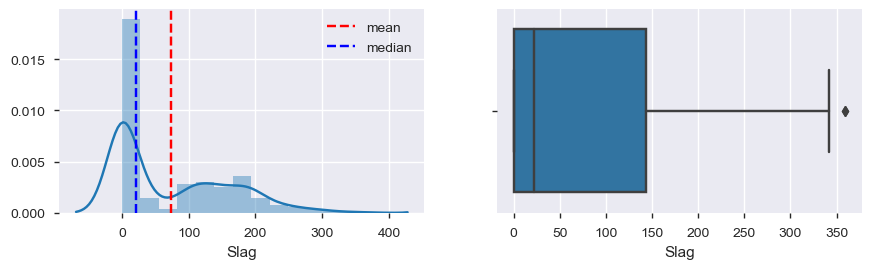

Count of missing values in slag is 0
Range of Values in slag are from 0.0 to 359.4
Mean, Median and Std dev for slag are 73.9, 22.0 and 86.28 respectively
First Quartile, Third Quartile and IQR are 0.0, 142.95 and 142.95 respectively


In [12]:
# Hist and Box plot for feature slag

plt.figure(figsize = (16,9))
plt.subplot(3,3,1)
sns.distplot(df1.slag)
plt.axvline(df1['slag'].mean(),linestyle="dashed",label="mean",color="r")
plt.axvline(df1['slag'].median(),linestyle="dashed",label="median",color="b")
plt.legend(loc="best")
plt.xlabel("Slag")

plt.subplot(3,3,2)
sns.boxplot(df1.slag)
plt.xlabel("Slag")
plt.show()

print("Count of missing values in slag is {}" .format(df1['slag'].isna().sum()))
print("Range of Values in slag are from {} to {}" .format(df1['slag'].min(), df1['slag'].max()))
print("Mean, Median and Std dev for slag are {}, {} and {} respectively" .format(
    round(df1['slag'].mean(),2), round(df1['slag'].median(),2), round(df1['slag'].std(),2)))
print("First Quartile, Third Quartile and IQR are {}, {} and {} respectively" .format(
    round(df1['slag'].quantile(q=0.25),2), round(df1['slag'].quantile(q=0.75),2), 
    round(df1['slag'].quantile(q=0.75)-df1['slag'].quantile(q=0.25),2)))

**Observations -**

    * Data in Slag looks bimodal(two peaks).
    * Data looks right skewed.
    * Very few outliers in Slag.

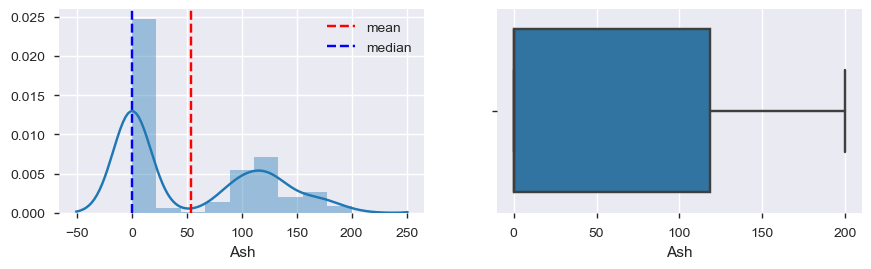

Count of missing values in ash is 0
Range of Values in ash are from 0.0 to 200.1
Mean, Median and Std dev for ash are 54.19, 0.0 and 64.0 respectively
First Quartile, Third Quartile and IQR are 0.0, 118.3 and 118.3 respectively


In [13]:
# Hist and Box plot for feature ash

plt.figure(figsize = (16,9))
plt.subplot(3,3,1)
sns.distplot(df1.ash)
plt.axvline(df1['ash'].mean(),linestyle="dashed",label="mean",color="r")
plt.axvline(df1['ash'].median(),linestyle="dashed",label="median",color="b")
plt.legend(loc="best")
plt.xlabel("Ash")

plt.subplot(3,3,2)
sns.boxplot(df1.ash)
plt.xlabel("Ash")
plt.show()

print("Count of missing values in ash is {}" .format(df1['ash'].isna().sum()))
print("Range of Values in ash are from {} to {}" .format(df1['ash'].min(), df1['ash'].max()))
print("Mean, Median and Std dev for ash are {}, {} and {} respectively" .format(
    round(df1['ash'].mean(),2), round(df1['ash'].median(),2), round(df1['ash'].std(),2)))
print("First Quartile, Third Quartile and IQR are {}, {} and {} respectively" .format(
    round(df1['ash'].quantile(q=0.25),2), round(df1['ash'].quantile(q=0.75),2), 
    round(df1['ash'].quantile(q=0.75)-df1['ash'].quantile(q=0.25),2)))

**Observations -**

    * Data in Ash looks bimodal(two peaks).
    * Data looks right skewed.
    * No outliers in Ash

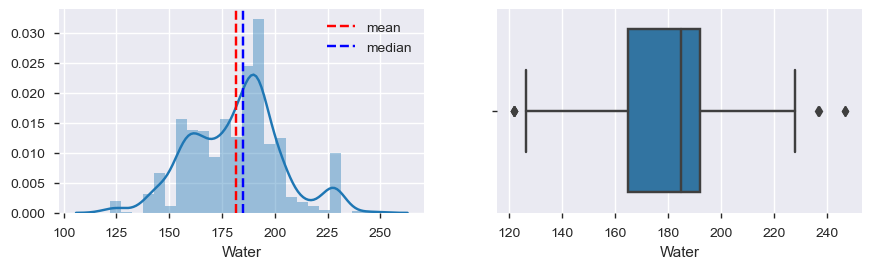

Count of missing values in water is 0
Range of Values in water are from 121.8 to 247.0
Mean, Median and Std dev for water are 181.57, 185.0 and 21.35 respectively
First Quartile, Third Quartile and IQR are 164.9, 192.0 and 27.1 respectively


In [14]:
# Hist and Box plot for feature water

plt.figure(figsize = (16,9))
plt.subplot(3,3,1)
sns.distplot(df1.water)
plt.axvline(df1['water'].mean(),linestyle="dashed",label="mean",color="r")
plt.axvline(df1['water'].median(),linestyle="dashed",label="median",color="b")
plt.legend(loc="best")
plt.xlabel("Water")

plt.subplot(3,3,2)
sns.boxplot(df1.water)
plt.xlabel("Water")
plt.show()

print("Count of missing values in water is {}" .format(df1['water'].isna().sum()))
print("Range of Values in water are from {} to {}" .format(df1['water'].min(), df1['water'].max()))
print("Mean, Median and Std dev for water are {}, {} and {} respectively" .format(
    round(df1['water'].mean(),2), round(df1['water'].median(),2), round(df1['water'].std(),2)))
print("First Quartile, Third Quartile and IQR are {}, {} and {} respectively" .format(
    round(df1['water'].quantile(q=0.25),2), round(df1['water'].quantile(q=0.75),2), 
    round(df1['water'].quantile(q=0.75)-df1['water'].quantile(q=0.25),2)))

**Observations -**

    * Data in Water looks multimodal(more than one peaks).
    * Very few outliers in Water. Outliers are present on both extremes.

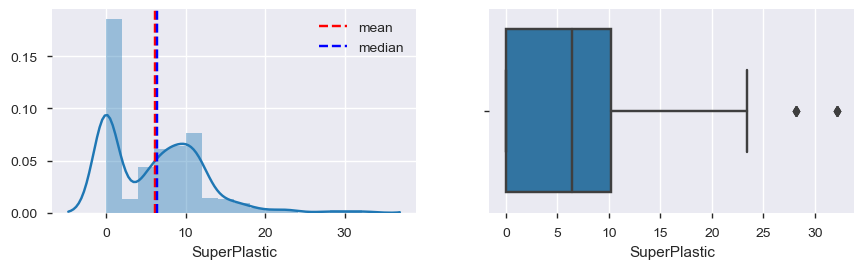

Count of missing values in superplastic is 0
Range of Values in superplastic are from 0.0 to 32.2
Mean, Median and Std dev for superplastic are 6.2, 6.4 and 5.97 respectively
First Quartile, Third Quartile and IQR are 0.0, 10.2 and 10.2 respectively


In [15]:
# Hist and Box plot for feature superplastic

plt.figure(figsize = (16,9))
plt.subplot(3,3,1)
sns.distplot(df1.superplastic)
plt.axvline(df1['superplastic'].mean(),linestyle="dashed",label="mean",color="r")
plt.axvline(df1['superplastic'].median(),linestyle="dashed",label="median",color="b")
plt.legend(loc="best")
plt.xlabel("SuperPlastic")

plt.subplot(3,3,2)
sns.boxplot(df1.superplastic)
plt.xlabel("SuperPlastic")
plt.show()

print("Count of missing values in superplastic is {}" .format(df1['superplastic'].isna().sum()))
print("Range of Values in superplastic are from {} to {}" .format(df1['superplastic'].min(), df1['superplastic'].max()))
print("Mean, Median and Std dev for superplastic are {}, {} and {} respectively" .format(
    round(df1['superplastic'].mean(),2), round(df1['superplastic'].median(),2), round(df1['superplastic'].std(),2)))
print("First Quartile, Third Quartile and IQR are {}, {} and {} respectively" .format(
    round(df1['superplastic'].quantile(q=0.25),2), round(df1['superplastic'].quantile(q=0.75),2), 
    round(df1['superplastic'].quantile(q=0.75)-df1['superplastic'].quantile(q=0.25),2)))

**Observations -**

    * Data in superplastic looks bimodal(two peaks).
    * Data looks right skewed.
    * Very few outliers in superplastic.

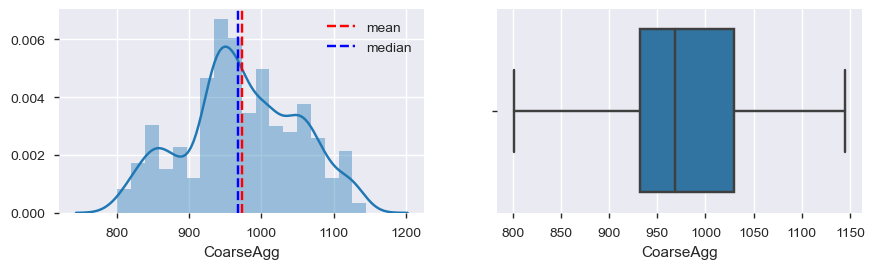

Count of missing values in coarseagg is 0
Range of Values in coarseagg are from 801.0 to 1145.0
Mean, Median and Std dev for coarseagg are 972.92, 968.0 and 77.75 respectively
First Quartile, Third Quartile and IQR are 932.0, 1029.4 and 97.4 respectively


In [16]:
# Hist and Box plot for coarseagg slag

plt.figure(figsize = (16,9))
plt.subplot(3,3,1)
sns.distplot(df1.coarseagg)
plt.axvline(df1['coarseagg'].mean(),linestyle="dashed",label="mean",color="r")
plt.axvline(df1['coarseagg'].median(),linestyle="dashed",label="median",color="b")
plt.legend(loc="best")
plt.xlabel("CoarseAgg")

plt.subplot(3,3,2)
sns.boxplot(df1.coarseagg)
plt.xlabel("CoarseAgg")
plt.show()

print("Count of missing values in coarseagg is {}" .format(df1['coarseagg'].isna().sum()))
print("Range of Values in coarseagg are from {} to {}" .format(df1['coarseagg'].min(), df1['coarseagg'].max()))
print("Mean, Median and Std dev for coarseagg are {}, {} and {} respectively" .format(
    round(df1['coarseagg'].mean(),2), round(df1['coarseagg'].median(),2), round(df1['coarseagg'].std(),2)))
print("First Quartile, Third Quartile and IQR are {}, {} and {} respectively" .format(
    round(df1['coarseagg'].quantile(q=0.25),2), round(df1['coarseagg'].quantile(q=0.75),2), 
    round(df1['coarseagg'].quantile(q=0.75)-df1['coarseagg'].quantile(q=0.25),2)))

**Observations -**

    * Data in CoarseAgg looks multimodal(more than one peaks).
    * No outliers in CoarseAgg

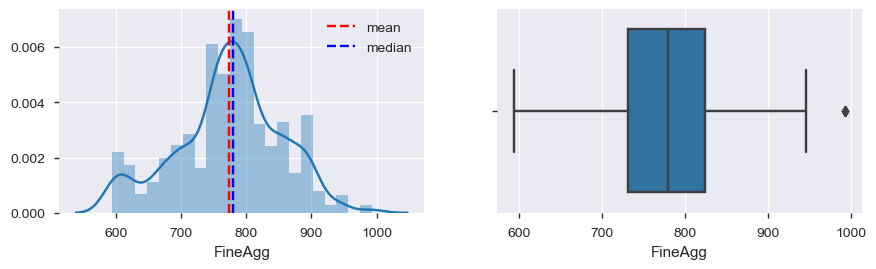

Count of missing values in fineagg is 0
Range of Values in fineagg are from 594.0 to 992.6
Mean, Median and Std dev for fineagg are 773.58, 779.5 and 80.18 respectively
First Quartile, Third Quartile and IQR are 730.95, 824.0 and 93.05 respectively


In [17]:
# Hist and Box plot for feature fineagg

plt.figure(figsize = (16,9))
plt.subplot(3,3,1)
sns.distplot(df1.fineagg)
plt.axvline(df1['fineagg'].mean(),linestyle="dashed",label="mean",color="r")
plt.axvline(df1['fineagg'].median(),linestyle="dashed",label="median",color="b")
plt.legend(loc="best")
plt.xlabel("FineAgg")

plt.subplot(3,3,2)
sns.boxplot(df1.fineagg)
plt.xlabel("FineAgg")
plt.show()

print("Count of missing values in fineagg is {}" .format(df1['fineagg'].isna().sum()))
print("Range of Values in fineagg are from {} to {}" .format(df1['fineagg'].min(), df1['fineagg'].max()))
print("Mean, Median and Std dev for fineagg are {}, {} and {} respectively" .format(
    round(df1['fineagg'].mean(),2), round(df1['fineagg'].median(),2), round(df1['fineagg'].std(),2)))
print("First Quartile, Third Quartile and IQR are {}, {} and {} respectively" .format(
    round(df1['fineagg'].quantile(q=0.25),2), round(df1['fineagg'].quantile(q=0.75),2), 
    round(df1['fineagg'].quantile(q=0.75)-df1['fineagg'].quantile(q=0.25),2)))

**Observations -**

    * Data in fineagg looks multimodal(more than one peaks).
    * Very few outliers in fineagg

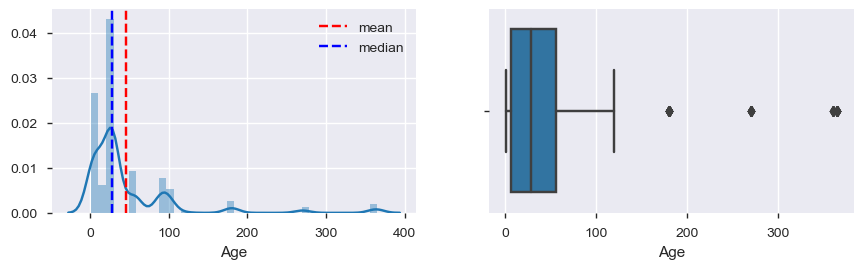

Count of missing values in age is 0
Range of Values in age are from 1 to 365
Mean, Median and Std dev for age are 45.66, 28.0 and 63.17 respectively
First Quartile, Third Quartile and IQR are 7.0, 56.0 and 49.0 respectively


In [18]:
# Hist and Box plot for feature age

plt.figure(figsize = (16,9))
plt.subplot(3,3,1)
sns.distplot(df1.age)
plt.axvline(df1['age'].mean(),linestyle="dashed",label="mean",color="r")
plt.axvline(df1['age'].median(),linestyle="dashed",label="median",color="b")
plt.legend(loc="best")
plt.xlabel("Age")

plt.subplot(3,3,2)
sns.boxplot(df1.age)
plt.xlabel("Age")
plt.show()

print("Count of missing values in age is {}" .format(df1['age'].isna().sum()))
print("Range of Values in age are from {} to {}" .format(df1['age'].min(), df1['age'].max()))
print("Mean, Median and Std dev for age are {}, {} and {} respectively" .format(
    round(df1['age'].mean(),2), round(df1['age'].median(),2), round(df1['age'].std(),2)))
print("First Quartile, Third Quartile and IQR are {}, {} and {} respectively" .format(
    round(df1['age'].quantile(q=0.25),2), round(df1['age'].quantile(q=0.75),2), 
    round(df1['age'].quantile(q=0.75)-df1['age'].quantile(q=0.25),2)))

**Observations -**

    * Data in age looks multimodal(more than one peaks).
    * Data looks right skewed.
    * Outliers present in age.

### Bivariate Analysis

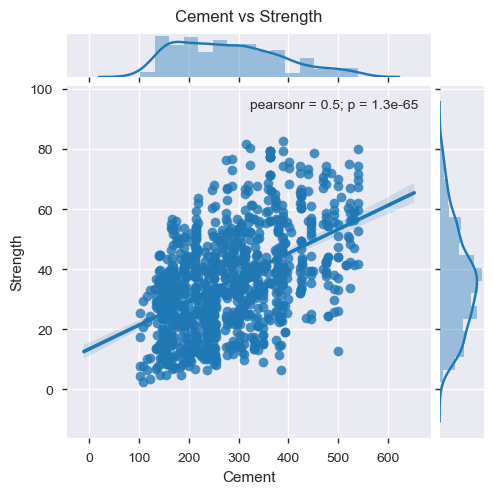

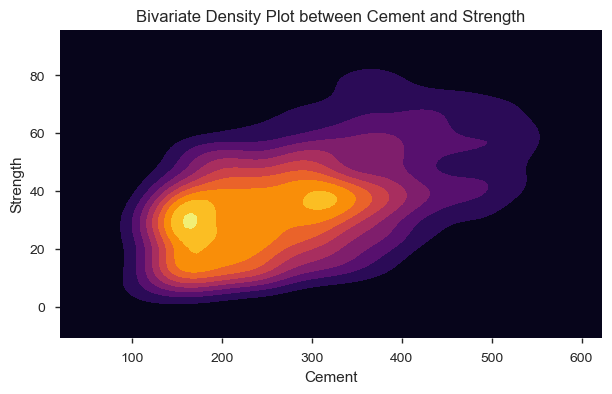

In [20]:
# Bivariate Analysis between Cement and Strength

g = sns.jointplot(x='cement',y='strength', data=df1, kind='reg',ratio = 7, height=5).annotate(stats.pearsonr)
g.fig.suptitle("Cement vs Strength") 
g.fig.subplots_adjust(top=0.93)
plt.xlabel("Cement")
plt.ylabel("Strength")
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(df1["cement"], df1["strength"], cmap="inferno",shade=True)
plt.title("Bivariate Density Plot between Cement and Strength")
plt.xlabel("Cement")
plt.ylabel("Strength")
plt.show()

**Observation**

    * Concrete Strength varies based on the quantity of Cement added to concrete. In most of the cases, Strength increases 
    when more cement is added to concrete.
    * Looks like positive Linear relationship between cement and strength
    * Correlation coefficient between Cement and Strength is 0.5
    * Density plot denotes bivariate density between cement and strength. Density is highest in cement range 
    approx. 150 to 320 and strength range approx. 15 to 40.

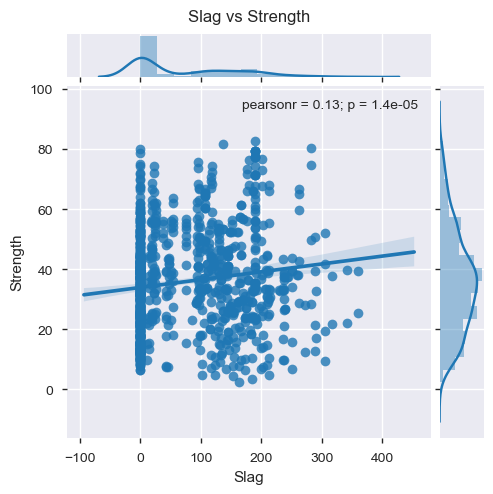

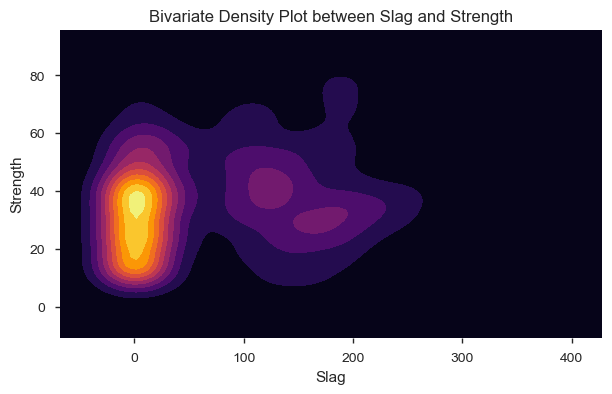

In [21]:
# Bivariate Analysis between Slag and Strength

g = sns.jointplot(x='slag',y='strength', data=df1, kind='reg',ratio = 7, height=5).annotate(stats.pearsonr)
g.fig.suptitle("Slag vs Strength") 
g.fig.subplots_adjust(top=0.93)
plt.xlabel("Slag")
plt.ylabel("Strength")
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(df1["slag"], df1["strength"], cmap="inferno",shade=True)
plt.title("Bivariate Density Plot between Slag and Strength")
plt.xlabel("Slag")
plt.ylabel("Strength")
plt.show()

**Observation**

    * There is no significant linear relationship between Slag and Strength.
    * Since the regression line is almost horizontal(parallel to x-axis), slag will have less influence in predicting 
    strength
    * Correlation coefficient between slag and Strength is 0.13
    * Density plot denotes bivariate density between slag and strength. Density is very high in two places.

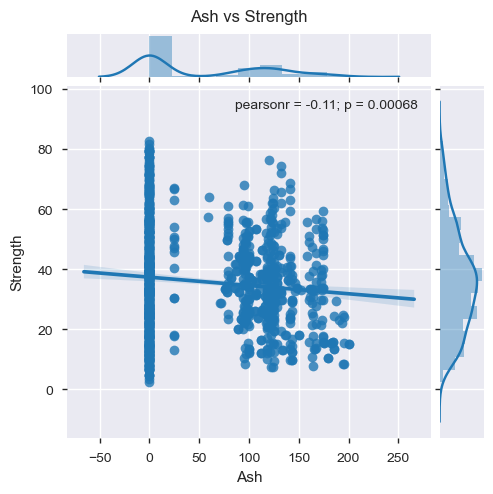

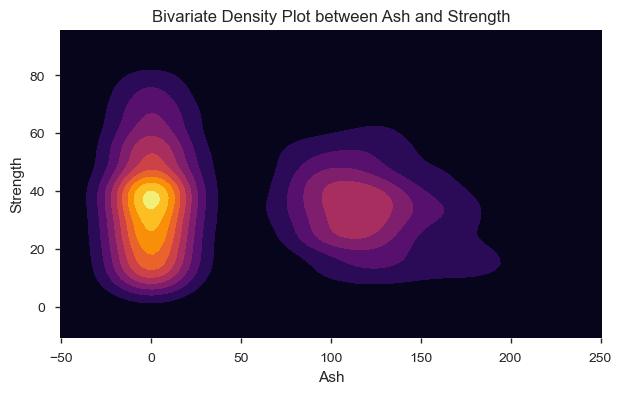

In [22]:
# Bivariate Analysis between Ash and Strength

g = sns.jointplot(x='ash',y='strength', data=df1, kind='reg',ratio = 7, height=5).annotate(stats.pearsonr)
g.fig.suptitle("Ash vs Strength") 
g.fig.subplots_adjust(top=0.93)
plt.xlabel("Ash")
plt.ylabel("Strength")
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(df1["ash"], df1["strength"], cmap="inferno",shade=True)
plt.title("Bivariate Density Plot between Ash and Strength")
plt.xlabel("Ash")
plt.ylabel("Strength")
plt.show()

**Observation**
    
    * For some cases, Strength decreases when more Ash is added to concrete
    * There is no significant linear relationship between Ash and Strength.
    * Since the regression line is almost horizontal(parallel to x-axis), ash will have less influence in predicting 
    strength
    * Correlation coefficient between Ash and Strength is -0.11
    * Density plot denotes bivariate density between ash and strength. Density is very high in two places.

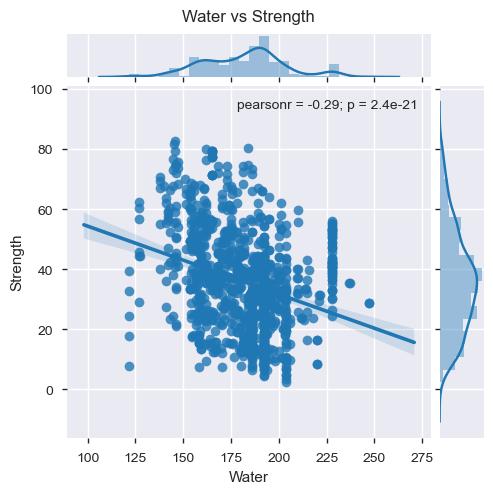

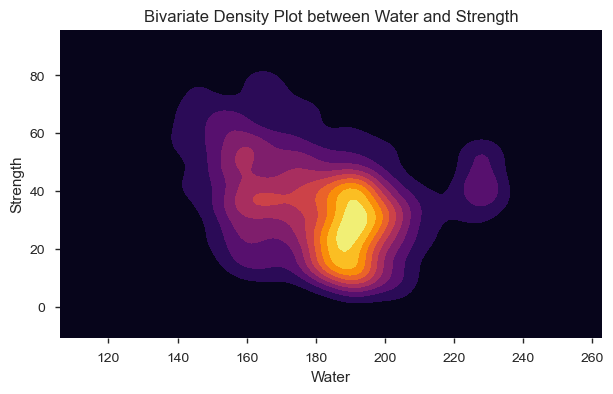

In [23]:
# Bivariate Analysis between Water and Strength

g = sns.jointplot(x='water',y='strength', data=df1, kind='reg',ratio = 7, height=5).annotate(stats.pearsonr)
g.fig.suptitle("Water vs Strength") 
g.fig.subplots_adjust(top=0.93)
plt.xlabel("Water")
plt.ylabel("Strength")
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(df1["water"], df1["strength"], cmap="inferno",shade=True)
plt.title("Bivariate Density Plot between Water and Strength")
plt.xlabel("Water")
plt.ylabel("Strength")
plt.show()

**Observation**

    * Concrete Strength varies based on the quantity of Water added to concrete. In most of the cases, Strength decreases 
    when more water is added to concrete.
    * Looks like negative Linear relationship between water and strength
    * Correlation coefficient between Water and Strength is -0.29
    * Density plot denotes bivariate density between water and strength. Density is highest in water range 
    approx. 180 to 200 and strength range approx. 15 to 40.

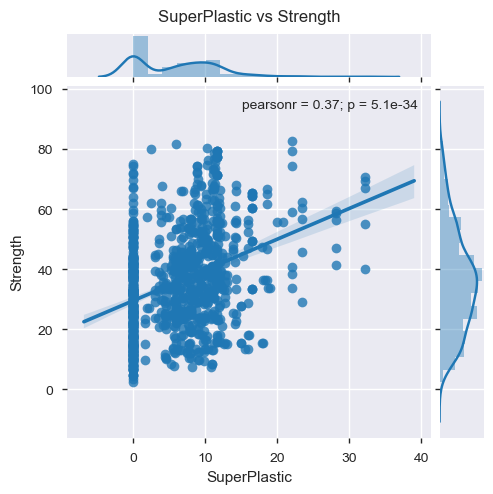

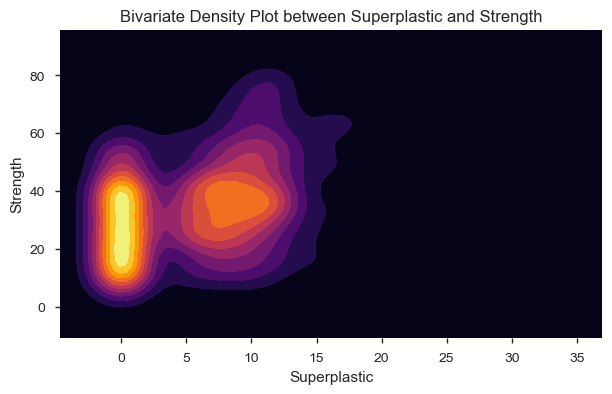

In [24]:
# Bivariate Analysis between superplastic and Strength

g = sns.jointplot(x='superplastic',y='strength', data=df1, kind='reg',ratio = 7, height=5).annotate(stats.pearsonr)
g.fig.suptitle("SuperPlastic vs Strength") 
g.fig.subplots_adjust(top=0.93)
plt.xlabel("SuperPlastic")
plt.ylabel("Strength")
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(df1["superplastic"], df1["strength"], cmap="inferno",shade=True)
plt.title("Bivariate Density Plot between Superplastic and Strength")
plt.xlabel("Superplastic")
plt.ylabel("Strength")
plt.show()

**Observation**

    * For some cases, Strength increases when more superplastic is added to concrete
    * There is no significant linear relationship between superplastic and Strength.
    * Correlation coefficient between superplastic and Strength is 0.37
    * Density plot denotes bivariate density between superplastic and strength. Density is very high in two places.

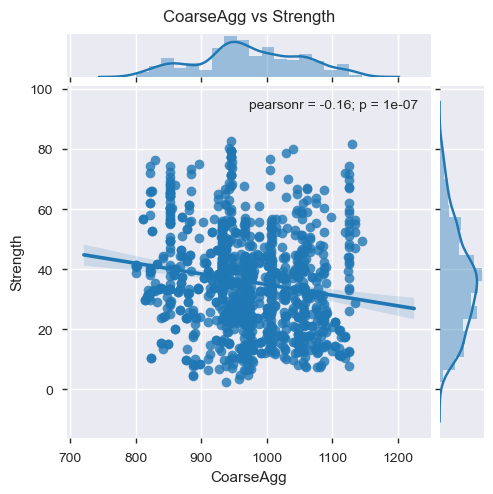

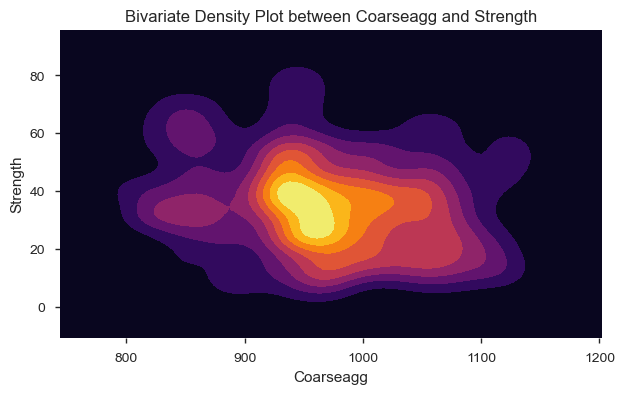

In [25]:
# Bivariate Analysis between coarseagg and Strength

g = sns.jointplot(x='coarseagg',y='strength', data=df1, kind='reg',ratio = 7, height=5).annotate(stats.pearsonr)
g.fig.suptitle("CoarseAgg vs Strength") 
g.fig.subplots_adjust(top=0.93)
plt.xlabel("CoarseAgg")
plt.ylabel("Strength")
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(df1["coarseagg"], df1["strength"], cmap="inferno",shade=True)
plt.title("Bivariate Density Plot between Coarseagg and Strength")
plt.xlabel("Coarseagg")
plt.ylabel("Strength")
plt.show()

**Observation**
    
    * For some cases, Strength decreases when more coarseagg is added to concrete
    * There is no significant linear relationship between coarseagg and Strength.
    * Since the regression line is almost horizontal(parallel to x-axis), coarseagg will have less influence in predicting 
    strength
    * Correlation coefficient between coarseagg and Strength is -0.16
    * Density plot denotes bivariate density between coarseagg and strength. Density is highest in coarseagg range 
    approx. 930 to 970 and strength range approx. 20 to 40.

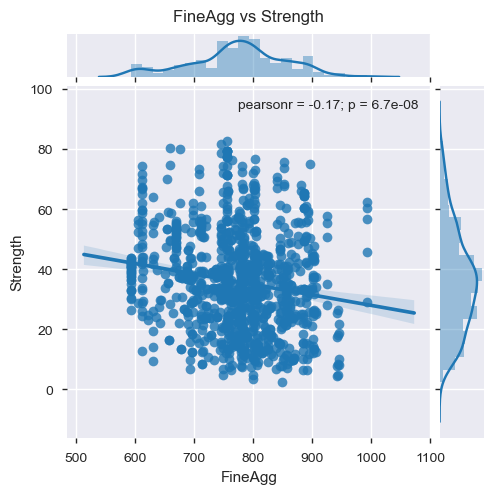

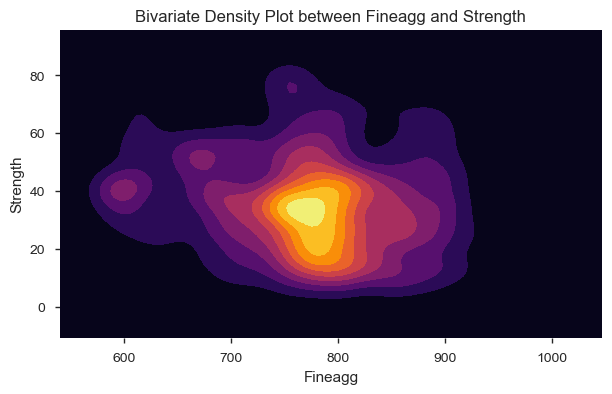

In [26]:
# Bivariate Analysis between fineagg and Strength

g = sns.jointplot(x='fineagg',y='strength', data=df1, kind='reg',ratio = 7, height=5).annotate(stats.pearsonr)
g.fig.suptitle("FineAgg vs Strength") 
g.fig.subplots_adjust(top=0.93)
plt.xlabel("FineAgg")
plt.ylabel("Strength")
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(df1["fineagg"], df1["strength"], cmap="inferno",shade=True)
plt.title("Bivariate Density Plot between Fineagg and Strength")
plt.xlabel("Fineagg")
plt.ylabel("Strength")
plt.show()

**Observation**
    
    * For some cases, Strength decreases when more fineagg is added to concrete
    * There is no significant linear relationship between fineagg and Strength.
    * Since the regression line is almost horizontal(parallel to x-axis), fineagg will have less influence in predicting 
    strength
    * Correlation coefficient between fineagg and Strength is -0.17
    * Density plot denotes bivariate density between fineagg and strength. Density is highest in fineagg range 
    approx. 750 to 820 and strength range approx. 15 to 40.

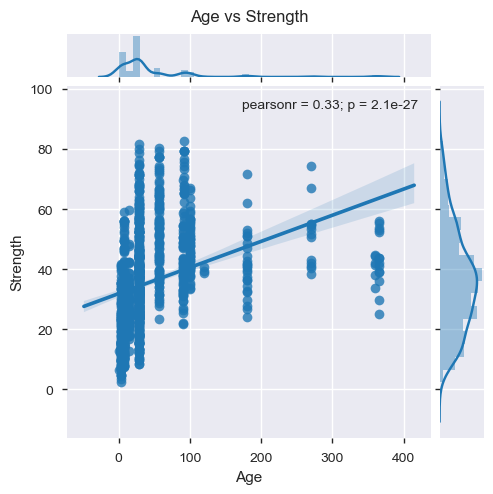

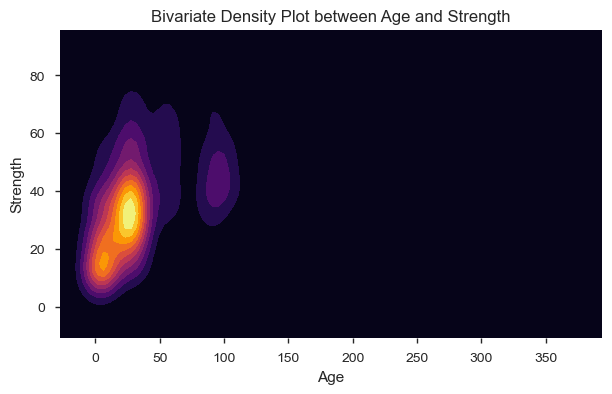

In [27]:
# Bivariate Analysis between Age and Strength

g = sns.jointplot(x='age',y='strength', data=df1, kind='reg',ratio = 7, height=5).annotate(stats.pearsonr)
g.fig.suptitle("Age vs Strength") 
g.fig.subplots_adjust(top=0.93)
plt.xlabel("Age")
plt.ylabel("Strength")
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(df1["age"], df1["strength"], cmap="inferno",shade=True)
plt.title("Bivariate Density Plot between Age and Strength")
plt.xlabel("Age")
plt.ylabel("Strength")
plt.show()

**Observation**

    * Concrete Strength varies based on the age to concrete. In most of the cases, Strength increases when age increases. 
    * Looks like positive Linear relationship between age and strength
    * Correlation coefficient between age and Strength is 0.33
    * Density plot denotes bivariate density between age and strength. Density is highest in age range 
    approx. 20 to 40 and strength range approx. 15 to 40.

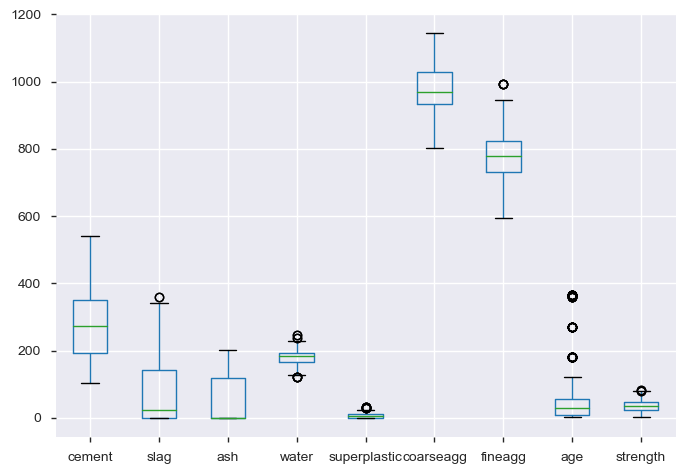

In [31]:
# box plot to visualize all the features
df1.boxplot()

    * Range of values are different for each feature.
    * Slag, water, superplastic and strength have outliers close to upper whisker.
    * Age and Fineagg have outliers far away from upper whisker.

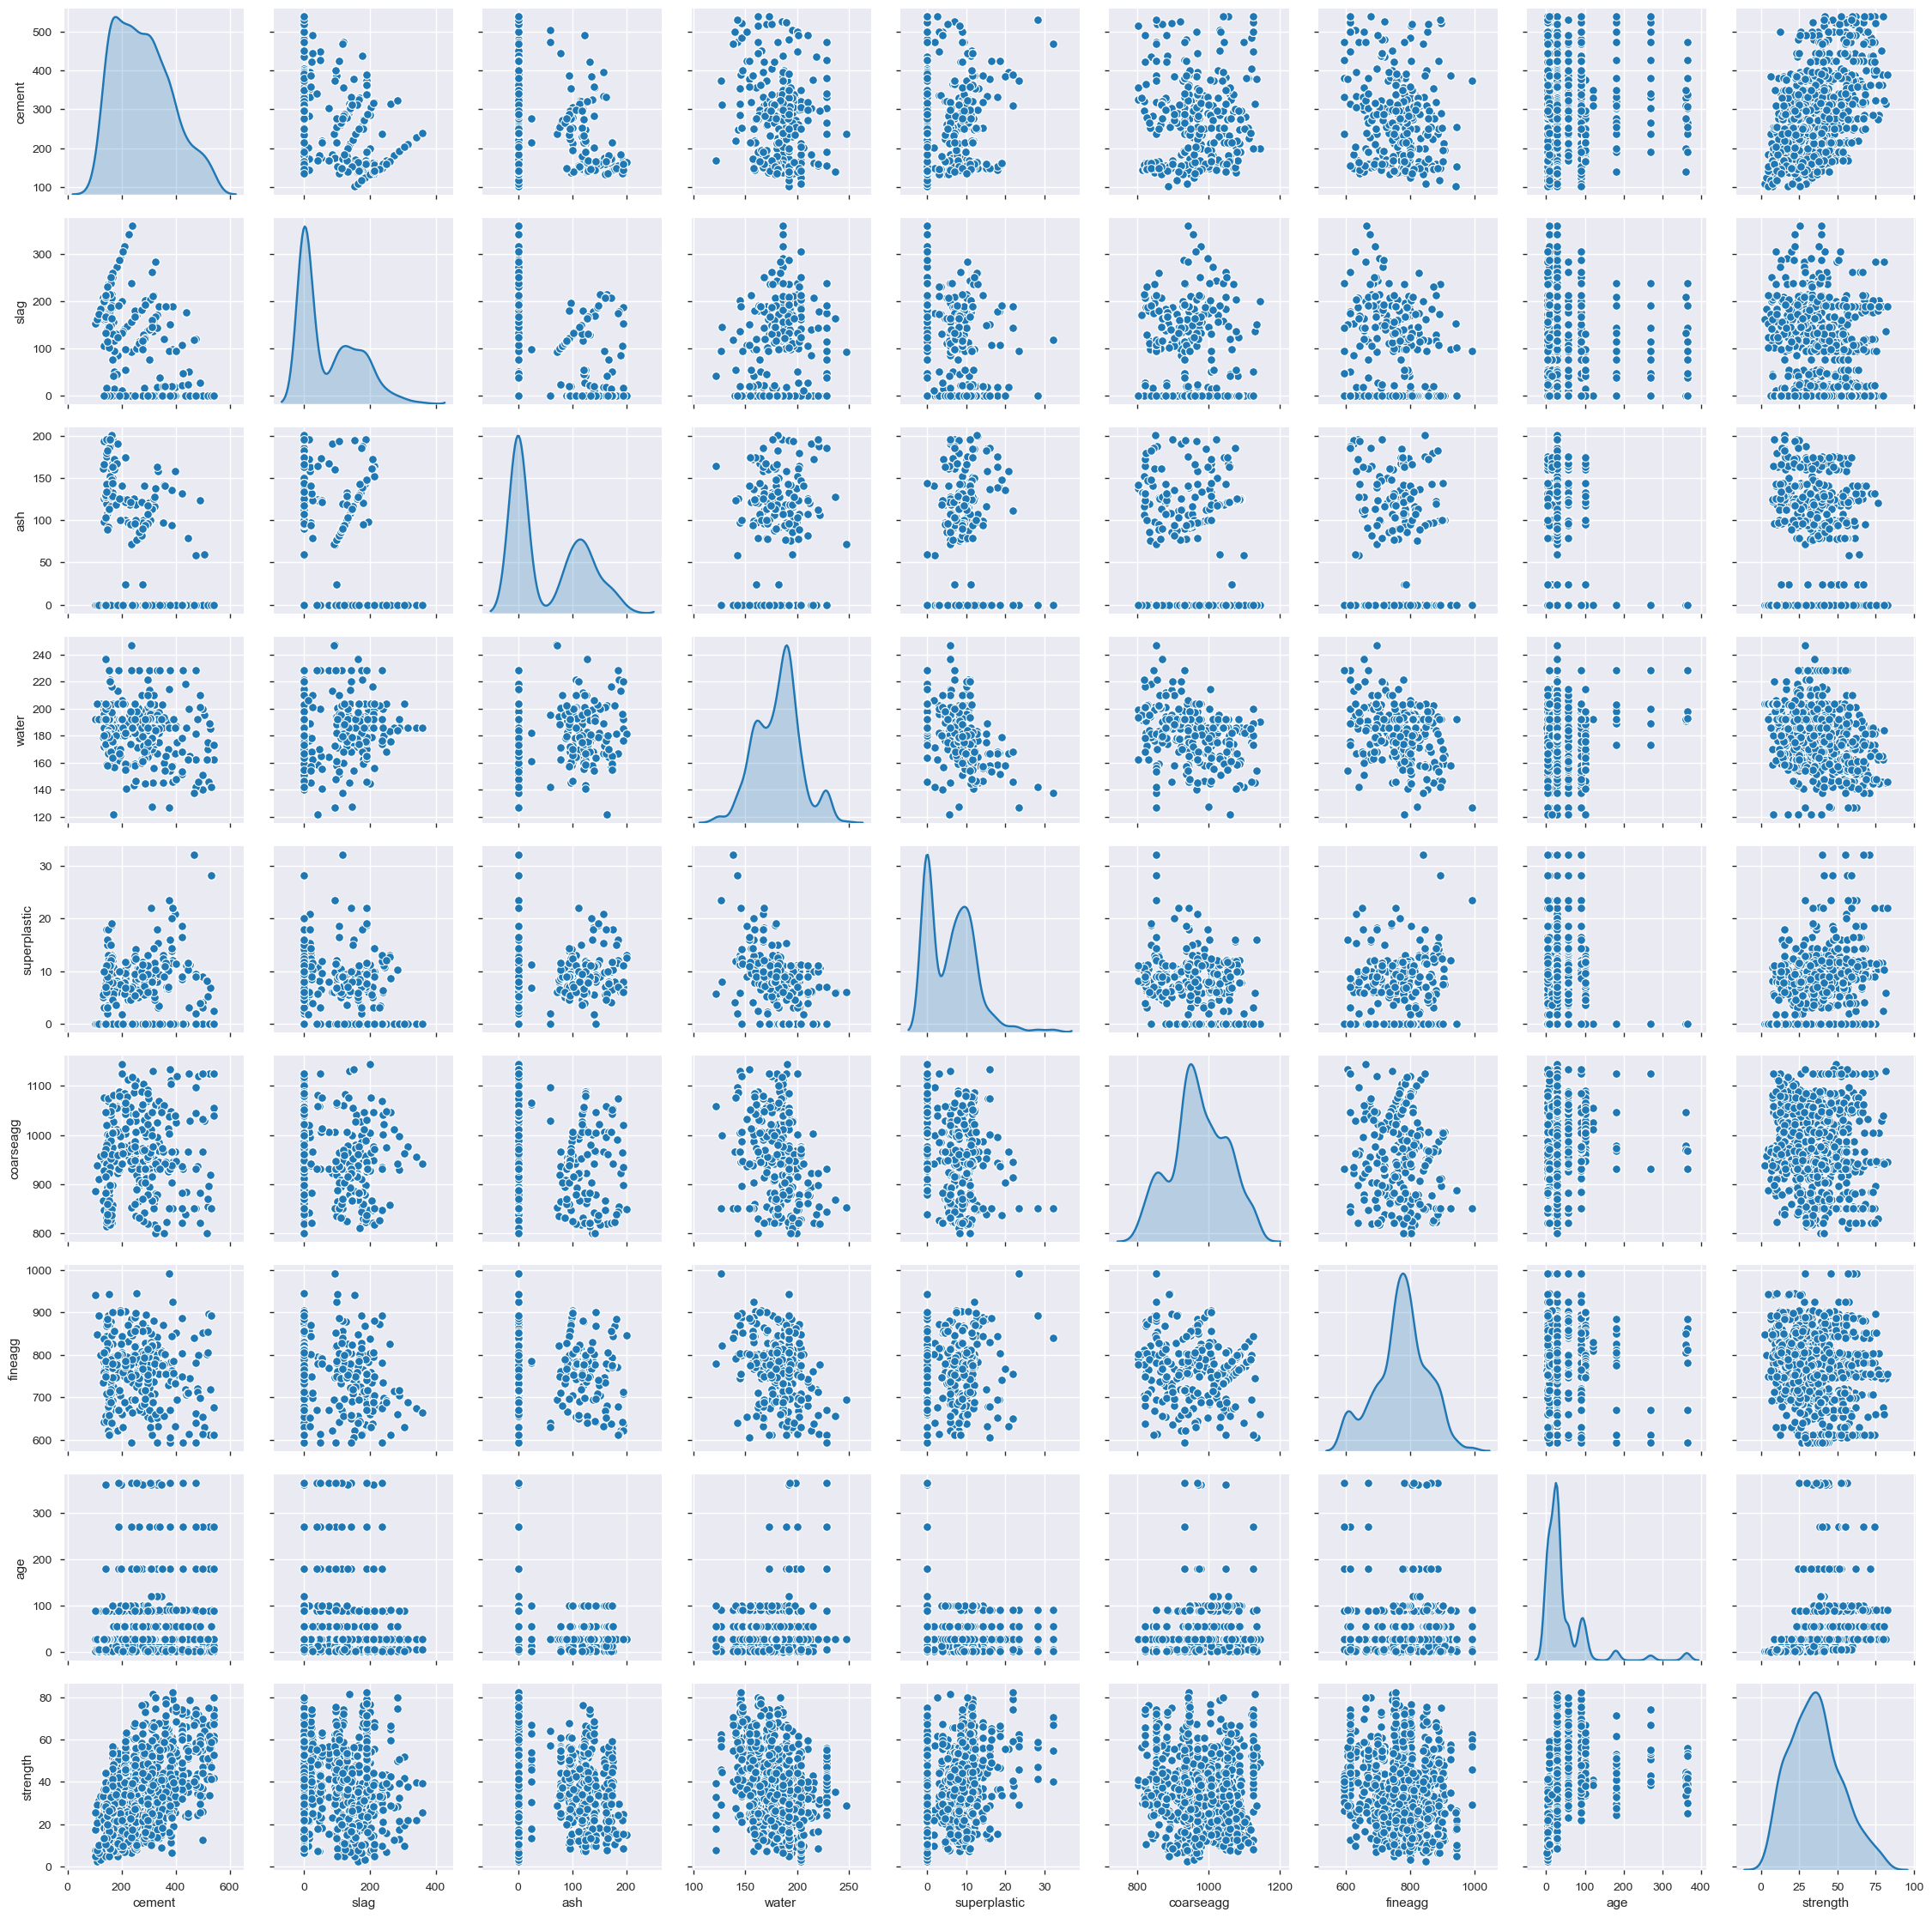

In [29]:
#### Pair Plot to identify distribution, relationship etc

sns.pairplot(df1, diag_kind='kde')

**Observations** 

    * Cement and strength are having single gaussian.
    * slag, ash and superplastic have two gaussians.
    * water, coarseagg, fineagg age have multiple gaussians.
    * Multiple gaussians denotes there could be multiple clusters present in the dataset.
    * There is a negative linear relationship between superplastic and water.
    * There is a negative linear relationship between coarseagg and water.
    * There is a negative linear relationship between fineagg and water.
    * There is a positive linear relationship between strength and cement.
    * There is a positive linear relationship between slag and cement.

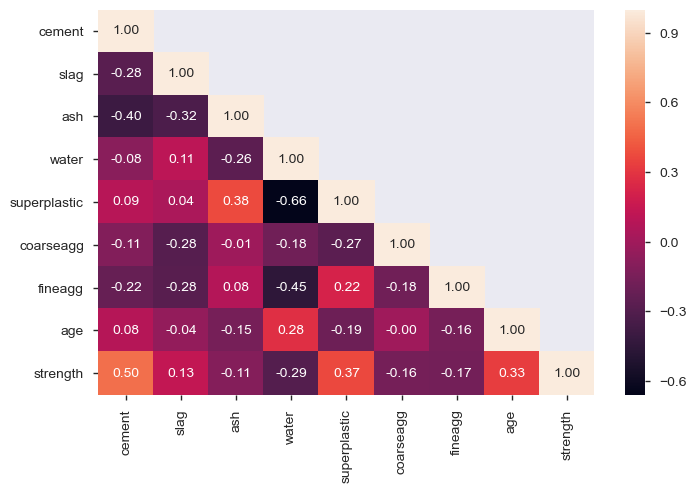

In [30]:
corr1 = df1.corr()
mask1=np.zeros_like(corr1);
mask1[np.triu_indices_from(mask1, 1)] = True

plt.figure(figsize=(8,5))
sns.heatmap(corr1,annot=True, fmt = '.2f', mask=mask1)

**Observations**

    * Strength has high correlation with cement. 
    * Strength has good correlation with superplastic and age.
    * Water has good correlation with superplastic, fineagg, age and Strength
    * Ash has good correlation with cement and slag.
    * Slag has good correlation with cement.

### Target (Strength) Feature Analysis 

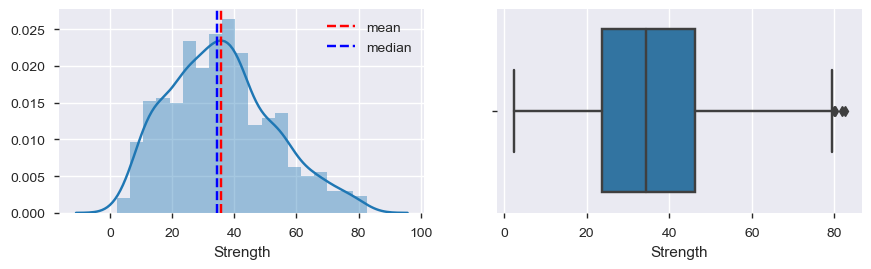

Count of missing values in strength is 0
Range of Values in strength are from 2.33 to 82.6
Mean, Median and Std dev for strength are 35.82, 34.45 and 16.71 respectively
First Quartile, Third Quartile and IQR are 23.71, 46.14 and 22.43 respectively


In [32]:
# Hist and Box plot for feature strength

plt.figure(figsize = (16,9))
plt.subplot(3,3,1)
sns.distplot(df1.strength)
plt.axvline(df1['strength'].mean(),linestyle="dashed",label="mean",color="r")
plt.axvline(df1['strength'].median(),linestyle="dashed",label="median",color="b")
plt.legend(loc="best")
plt.xlabel("Strength")

plt.subplot(3,3,2)
sns.boxplot(df1.strength)
plt.xlabel("Strength")
plt.show()

print("Count of missing values in strength is {}" .format(df1['strength'].isna().sum()))
print("Range of Values in strength are from {} to {}" .format(df1['strength'].min(), df1['strength'].max()))
print("Mean, Median and Std dev for strength are {}, {} and {} respectively" .format(
    round(df1['strength'].mean(),2), round(df1['strength'].median(),2), round(df1['strength'].std(),2)))
print("First Quartile, Third Quartile and IQR are {}, {} and {} respectively" .format(
    round(df1['strength'].quantile(q=0.25),2), round(df1['strength'].quantile(q=0.75),2), 
    round(df1['strength'].quantile(q=0.75)-df1['strength'].quantile(q=0.25),2)))

**Observations -**

    * Data in Strength looks normally distributed.
    * Few Outliers present in Strength. However, this will not be handled. 

In [33]:
#Take backup of original dataframe

df2_m = df1.copy() # data manipulations will be performed in df2

### Handling Outliers and Missing Values

In [34]:
colsa = []
#except strength all the variables are moved to temp variable
colsa = ('cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age')   
colsa

('cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age')

In [35]:
# loop to check outliers in each column. If outliers are present in a column, its replaced with upper/lower whisker

TMP1 = pd.DataFrame()
for cols in colsa:
    Q1 = df2_m[cols].quantile(0.25) #first quantile
    Q3 = df2_m[cols].quantile(0.75) #third quantile
    IQR = Q3 - Q1 
    TMP1 = []
    TMP1 = df2_m[cols][(df2_m[cols] < (Q1 - 1.5 * IQR)) | (df2_m[cols] > (Q3 + 1.5 * IQR))]
    print("\nOutliers in {} : \n{}".format(cols, TMP1))      
    if TMP1.count() > 0:
        UP = Q3 + 1.5 * IQR    # calculate upper whisker
        LP = Q1 - 1.5 * IQR    # calculate lower whisker
        df2_m[cols] = np.where(df2_m[cols] > UP, UP, df2_m[cols]) # replace higher-end outliers with upper whisker
        df2_m[cols] = np.where(df2_m[cols] < LP, LP, df2_m[cols]) # replace lower-end outliers with lower whisker
        print("\nAfter handling Outliers in {} : \n{}".format(cols, 
                                                              df2_m[cols][(df2_m[cols] < (Q1 - 1.5 * IQR)) | (df2_m[cols] > (Q3 + 1.5 * IQR))]))


Outliers in cement : 
Series([], Name: cement, dtype: float64)

Outliers in slag : 
918    359.4
990    359.4
Name: slag, dtype: float64

After handling Outliers in slag : 
Series([], Name: slag, dtype: float64)

Outliers in ash : 
Series([], Name: ash, dtype: float64)

Outliers in water : 
66     247.0
263    246.9
432    121.8
462    121.8
587    121.8
740    237.0
789    121.8
826    236.7
914    121.8
Name: water, dtype: float64

After handling Outliers in water : 
Series([], Name: water, dtype: float64)

Outliers in superplastic : 
44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64

After handling Outliers in superplastic : 
Series([], Name: superplastic, dtype: float64)

Outliers in coarseagg : 
Series([], Name: coarseagg, dtype: float64)

Outliers in fineagg : 
129    992.6
447    992.6
504    992.6
584    992.6
857    992.6
Name: fineagg, dtype: float64

After hand

**All the outliers are replaced with lower/upper whisker**

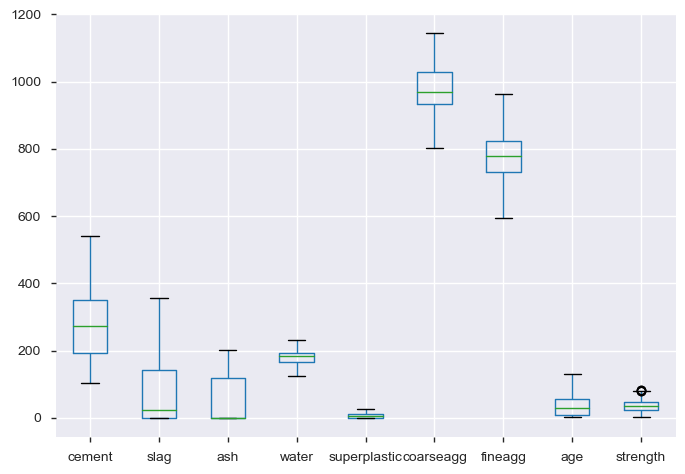

In [36]:
df2_m.boxplot()

**No new outliers in the independent features. Outliers are not handled in target feature Strength**

In [37]:
# Identifying zero's in each feature

print("Number of Zero's in Cement       - ", df2_m["cement"].isin([0]).sum())
print("Number of Zero's in Slag         - ", df2_m["slag"].isin([0]).sum())
print("Number of Zero's in Ash          - ", df2_m["ash"].isin([0]).sum())
print("Number of Zero's in Water        - ", df2_m["water"].isin([0]).sum())
print("Number of Zero's in SuperPlastic - ", df2_m["superplastic"].isin([0]).sum())
print("Number of Zero's in CoarseAgg    - ", df2_m["coarseagg"].isin([0]).sum())
print("Number of Zero's in FineAgg      - ", df2_m["fineagg"].isin([0]).sum())
print("Number of Zero's in Age          - ", df2_m["age"].isin([0]).sum())
print("Number of Zero's in Strength     - ", df2_m["strength"].isin([0]).sum())

Number of Zero's in Cement       -  0
Number of Zero's in Slag         -  471
Number of Zero's in Ash          -  566
Number of Zero's in Water        -  0
Number of Zero's in SuperPlastic -  379
Number of Zero's in CoarseAgg    -  0
Number of Zero's in FineAgg      -  0
Number of Zero's in Age          -  0
Number of Zero's in Strength     -  0


As we observed earlier, there are no NaN values in the dataset. However, features Slag, Water and Superplastic have many zero's. We do not know whether zero's are valid for these features and no business teams are available to confirm on this. Therefore, I am not going to handle zero's

### Feature Engineering

In [38]:
# df1 has original data
# df2_m has data with outliers handled

In [39]:
#Raw data has been split into train and test

X1 = df1.drop("strength", axis = 1)  
Y1 = df1["strength"]

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1, Y1, test_size = 0.30, random_state=1)

In [40]:
# Outliers handled data has been split into train and test

X2 = df2_m.drop("strength", axis = 1)  
Y2 = df2_m["strength"]

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, Y2, test_size = 0.30, random_state=1)

In [41]:
# Scale the data
sc = StandardScaler()
xtrain2_sc = sc.fit_transform(xtrain2)
xtest2_sc = sc.transform(xtest2)

In [42]:
# Models built on Raw data

print("Model scores on Raw data\n")

LR1 = LinearRegression()
LR1.fit(xtrain1,ytrain1)
LR1_TR = LR1.score(xtrain1,ytrain1)
LR1_TS = LR1.score(xtest1,ytest1)
print("Linear Regression Training score on Raw data :", round(LR1_TR * 100, 2))
print("Linear Regression Test score on Raw data     :", round(LR1_TS * 100, 2))

RI1 = Ridge()
RI1.fit(xtrain1,ytrain1)
RI1_TR = RI1.score(xtrain1,ytrain1)
RI1_TS = RI1.score(xtest1,ytest1)
print("\nRidge Training score on Raw data :", round(RI1_TR * 100, 2))
print("Ridge Test score on Raw data     :", round(RI1_TS * 100, 2))

LA1 = Lasso()
LA1.fit(xtrain1,ytrain1)
LA1_TR = LA1.score(xtrain1,ytrain1)
LA1_TS = LA1.score(xtest1,ytest1)
print("\nLasso Training score on Raw data :", round(LA1_TR * 100, 2))
print("Lasso Test score on Raw data     :", round(LA1_TS * 100, 2))

Model scores on Raw data

Linear Regression Training score on Raw data : 60.31
Linear Regression Test score on Raw data     : 63.39

Ridge Training score on Raw data : 60.31
Ridge Test score on Raw data     : 63.39

Lasso Training score on Raw data : 60.29
Lasso Test score on Raw data     : 63.51


    * Model scores are not impressive on Raw data.

In [43]:
# Models built on Scaled data (Outliers are handled)

print("Model scores on Scaled data\n")

LR1 = LinearRegression()
LR1.fit(xtrain2_sc,ytrain2)
LR1_TR = LR1.score(xtrain2_sc,ytrain2)
LR1_TS = LR1.score(xtest2_sc,ytest2)
print("Linear Regression Training score on Scaled data :", round(LR1_TR * 100, 2))
print("Linear Regression Test score on Scaled data     :", round(LR1_TS * 100, 2))

RI1 = Ridge()
RI1.fit(xtrain2_sc,ytrain2)
RI1_TR = RI1.score(xtrain2_sc,ytrain2)
RI1_TS = RI1.score(xtest2_sc,ytest2)
print("\nRidge Training score on Scaled data :", round(RI1_TR * 100, 2))
print("Ridge Test score on Scaled data     :", round(RI1_TS * 100, 2))

LA1 = Lasso()
LA1.fit(xtrain2_sc,ytrain1)
LA1_TR = LA1.score(xtrain2_sc,ytrain2)
LA1_TS = LA1.score(xtest2_sc,ytest2)
print("\nLasso Training score on Scaled data :", round(LA1_TR * 100, 2))
print("Lasso Test score on Scaled data     :", round(LA1_TS * 100, 2))

Model scores on Scaled data

Linear Regression Training score on Scaled data : 72.5
Linear Regression Test score on Scaled data     : 73.27

Ridge Training score on Scaled data : 72.49
Ridge Test score on Scaled data     : 73.33

Lasso Training score on Scaled data : 67.99
Lasso Test score on Scaled data     : 67.91


    * Model scores are improved on Scaled Data

In [44]:
print ("Linear model Coefficients:", (LR1.coef_))
print ("Ridge model Coefficients:", (RI1.coef_))
print ("Lasso model Coefficients:", (LA1.coef_))

Linear model Coefficients: [12.89987385  8.98250489  5.41849695 -2.96088678  1.79234297  1.27834778
  1.97294987  9.08576276]
Ridge model Coefficients: [12.64322311  8.73358553  5.19433329 -3.12425244  1.79851657  1.11307372
  1.75741565  9.06343495]
Lasso model Coefficients: [ 7.5619584   3.67949869  0.         -2.90613918  3.3324574  -0.
 -0.          7.4097721 ]


        * Ridge has reduced the magnitude of coefficients when compared to Linear regression.
        * As expected, Lasso has brought down the coeffecients to 0 for few features.
        * Cement, age, slag and ash have higher influence than remaining features.

#### Explore Gaussians

In [45]:
#Scale the dataframe for clustering

df2_m_zsc = df2_m.apply(zscore)

In [46]:
#Loop to find the optimal cluster
arr1 = []
cl = np.arange(2,11)

for k in cl:
    mod2 = KMeans(n_clusters=k)
    mod2.fit(df2_m_zsc)
    arr1.append(np.mean(np.min(cdist(df2_m_zsc,mod2.cluster_centers_), axis=1)))

Text(0, 0.5, 'Distortion')

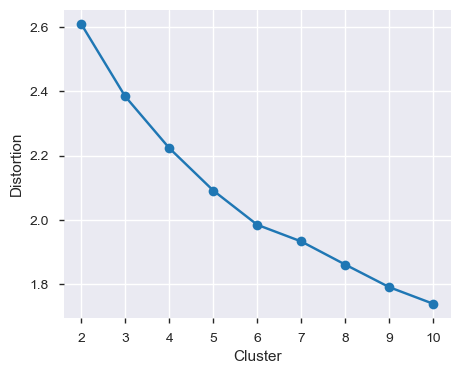

In [47]:
plt.figure(figsize = (5,4))
plt.plot(cl,arr1,marker = "o")
plt.xlabel("Cluster")
plt.ylabel("Distortion")

    * Reduction in distortion is minimal from cluster 6. Hence, I am proceeding with cluster 6.

In [48]:
cluster = KMeans(n_clusters = 6)
cluster.fit(df2_m_zsc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.49046797, -0.21597723, -0.82291932,  1.21014712, -1.03478356,
         0.01044439, -0.65343484,  1.99820648,  0.44222508],
       [-0.42405829,  0.17850001,  1.09490842,  0.58699943,  0.40657837,
        -1.19463684, -0.34199638, -0.32941517, -0.24397108],
       [-0.60422387, -0.65372054,  1.11155159, -0.6226218 ,  0.41855486,
         0.60499991,  0.41909729,  0.01242028, -0.1724121 ],
       [ 0.67444667, -0.84293005, -0.83544352,  0.40081971, -1.01154157,
         0.72330498, -0.04469988, -0.59915954, -0.58771787],
       [ 1.02103222,  0.47029007, -0.50283433, -0.98355009,  1.12502522,
        -0.61943165,  0.20650046, -0.10063455,  1.20195423],
       [-0.83681819,  1.3949742 , -0.82598032,  0.50721783, -0.67972401,
        -0.0146711 , -0.17791366, -0.41403415, -0.65647555]])

    * Six cluster cerntroids are created.

In [50]:
df2_m_cluster = df2_m.copy()

In [51]:
cl_pred=cluster.predict(df2_m_zsc)
df2_m_cluster["Group"] = cl_pred #create a column with cluster predictions
df2_m_zsc["Group"] = cl_pred 

In [52]:
df2_m_cluster

cement   slag    ash  water  superplastic  coarseagg  fineagg    age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28.0   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14.0   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28.0   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28.0   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28.0   
...      ...    ...    ...    ...           ...        ...      ...    ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28.0   
1026   531.3    0.0    0.0  141.8          25.5      852.1    893.7    3.0   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28.0   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  129.5   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7.0   

      strength  Group  
0        29.89      5  
1        23.51      2  
2        29.22      2  
3        45.85      5  
4        18.29      5  
...        ...    ...  
1025     13.29      2  
1026     41.30      4  
1027     44.28      1  
1028     55.06      0  
1029     52.61      3  

[1030 rows x 10 columns]

In [53]:
df2_m_cluster["Group"].value_counts()

2    274
4    191
5    160
3    159
1    135
0    111
Name: Group, dtype: int64

    * Six groups 0,1,2,3,4 and 5 are formed with rows 159, 135, 111, 274, 191 and 160 rows respectively

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020118F18308>,
      dtype=object)

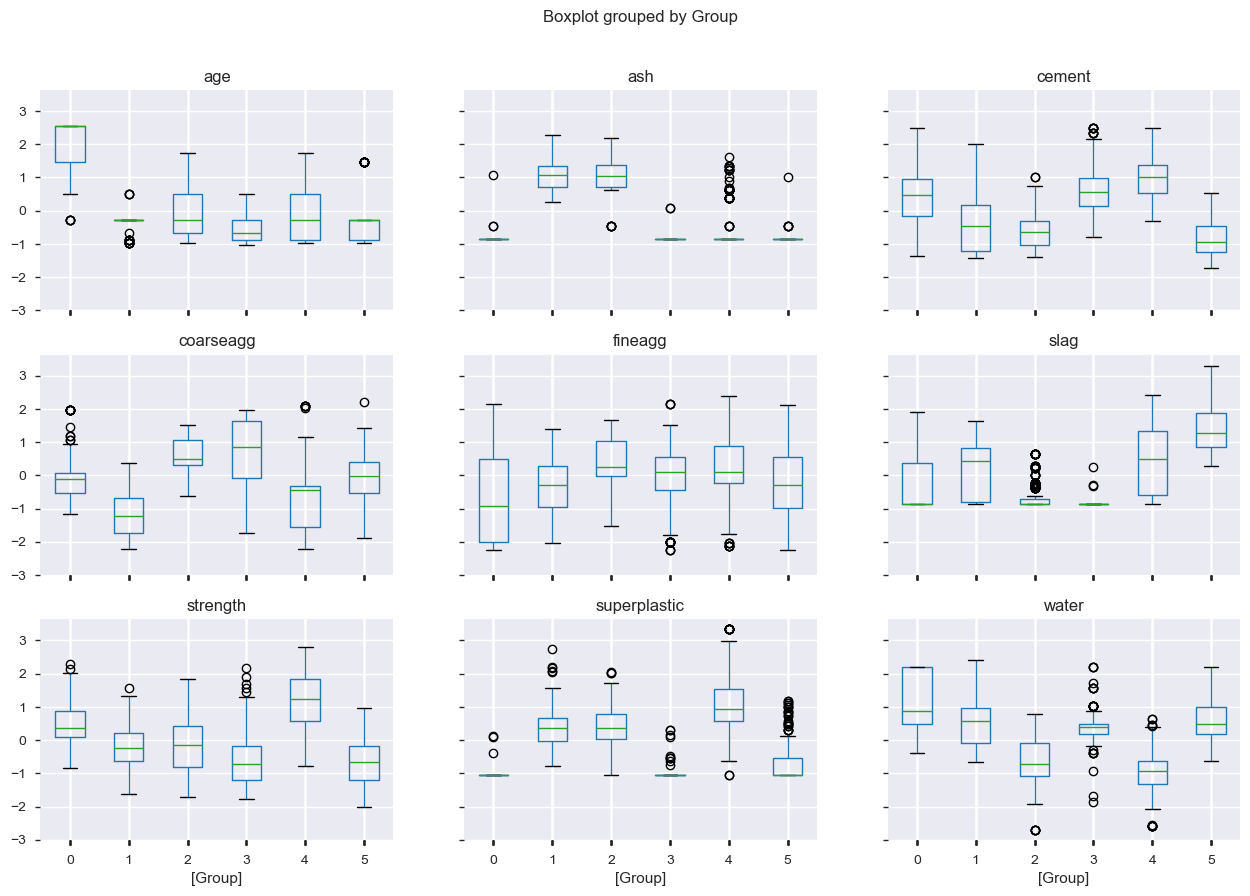

In [54]:
df2_m_zsc.boxplot(by = "Group", layout = (3,3),figsize=(15,10))

**Observations**

    * In all the features, body of the clusters are overlapping. There is no clear separation of data in the cluster level.
    * In most of the features, multiple clusters have similar range of values.
    * As the data is overlapping in clusters for all the features, we can determine that none of the independent 
    features are strong predictor of target feature(strength).
    * As there is no significant seggregation of data in cluster level, there is no point in builing models at 
    cluster level. 
    * Therefore, cluster level models are not going to be built in this assignment.

#### Create Composite Features and Decide on Complexity of the model

As observed in EDA, there are no significant relationships between Independent features. Therefore, PCA wont work well on this dataset. Going ahead with Polynomial features.

In [55]:
# polynomial features are created with degree of 2, and if there is any interaction between features
poly = PolynomialFeatures(degree = 2) 

In [56]:
xtrain2_sc_poly = poly.fit_transform(xtrain2_sc)
xtest2_sc_poly = poly.transform(xtest2_sc)
print("Xtrain Before applying polynomial features : ", xtrain2_sc.shape)
print("Xtrain After applying polynomial features  : ", xtrain2_sc_poly.shape)
print("\nXtest Before applying polynomial features : ", xtest2_sc.shape)
print("Xtest After applying polynomial features  : ", xtest2_sc_poly.shape)

Xtrain Before applying polynomial features :  (721, 8)
Xtrain After applying polynomial features  :  (721, 45)

Xtest Before applying polynomial features :  (309, 8)
Xtest After applying polynomial features  :  (309, 45)


    Number of independent features increased from 8 to 45.

In [57]:
# Models built on Polynomial Features

print("Model scores on Polynomial Features\n")

LR2 = LinearRegression()
LR2.fit(xtrain2_sc_poly,ytrain2)
LR2_TR = LR2.score(xtrain2_sc_poly,ytrain2)
LR2_TS = LR2.score(xtest2_sc_poly,ytest2)
print("Linear Regression Training score on Polynomial features :", round(LR2_TR * 100, 2))
print("Linear Regression Test score on Polynomial features     :", round(LR2_TS * 100, 2))

RI2 = Ridge()
RI2.fit(xtrain2_sc_poly,ytrain2)
RI2_TR = RI2.score(xtrain2_sc_poly,ytrain2)
RI2_TS = RI2.score(xtest2_sc_poly,ytest2)
print("\nRidge Training score on Polynomial features :", round(RI2_TR * 100, 2))
print("Ridge Test score on Polynomial features     :", round(RI2_TS * 100, 2))

LA2 = Lasso()
LA2.fit(xtrain2_sc_poly,ytrain1)
LA2_TR = LA2.score(xtrain2_sc_poly,ytrain2)
LA2_TS = LA2.score(xtest2_sc_poly,ytest2)
print("\nLasso Training score on Polynomial features :", round(LA2_TR * 100, 2))
print("Lasso Test score on Polynomial features     :", round(LA2_TS * 100, 2))

Model scores on Polynomial Features

Linear Regression Training score on Polynomial features : 86.79
Linear Regression Test score on Polynomial features     : 83.92

Ridge Training score on Polynomial features : 86.71
Ridge Test score on Polynomial features     : 83.83

Lasso Training score on Polynomial features : 78.02
Lasso Test score on Polynomial features     : 75.73


    * On Scaled data - LR, Ridge and Lasso test scores were 73.2, 73.3 and 67.9 respectively. 
    * With Polynomial features, there is significant increase in model scores.

In [58]:
print ("Linear model Coefficients:", (LR2.coef_))
print ("Ridge model Coefficients:", (RI2.coef_))
print ("Lasso model Coefficients:", (LA2.coef_))

Linear model Coefficients: [ 9.23162399e-15  1.42108766e+01  9.66077137e+00  4.09380595e+00
 -2.72490019e+00  1.68188875e+00  1.67972448e+00  2.47991951e+00
  1.53038004e+01 -3.98077787e+00 -5.03738809e+00 -2.38938760e+00
 -1.04858274e+01 -5.95197371e+00 -5.27304723e+00 -8.30097231e+00
  2.26997222e-01 -2.00578003e+00 -6.14829625e-01 -6.66777310e+00
 -3.73790087e+00 -3.51396888e+00 -5.13586180e+00  1.12620113e+00
  7.10225256e-01 -6.24486008e+00 -5.47246356e+00 -2.00179350e+00
 -3.25808736e+00  5.00251495e-01 -4.09454862e+00 -4.25877066e+00
 -7.87464083e+00 -9.20199516e+00  1.40198458e-02 -2.03050924e+00
 -3.88385867e+00 -4.46379772e+00 -2.82745848e-02 -2.49155156e+00
 -5.54670276e+00  2.71163330e-01 -5.10249085e+00 -1.25184799e-01
 -5.24673383e+00]
Ridge model Coefficients: [ 0.         13.66597459  9.2365297   3.7360122  -3.01409557  1.73322711
  1.43506081  2.11972655 15.20522119 -1.83543015 -1.10307175  0.96562623
 -6.99438577 -4.36056524 -1.26012816 -3.91305572  0.18855379 -0.2418

        * Ridge has reduced the magnitude of coefficients when compared to Linear regression.
        * As expected, Lasso has brought down the coeffecients to 0 for multiple features.

In [59]:
# polynomial features created with degree of 3 to check how model performs with so many features
poly = PolynomialFeatures(degree = 3) 

In [60]:
xtrain2_sc_poly = poly.fit_transform(xtrain2_sc)
xtest2_sc_poly = poly.transform(xtest2_sc)
print("Xtrain Before applying polynomial features : ", xtrain2_sc.shape)
print("Xtrain After applying polynomial features  : ", xtrain2_sc_poly.shape)
print("\nXtest Before applying polynomial features : ", xtest2_sc.shape)
print("Xtest After applying polynomial features  : ", xtest2_sc_poly.shape)

Xtrain Before applying polynomial features :  (721, 8)
Xtrain After applying polynomial features  :  (721, 165)

Xtest Before applying polynomial features :  (309, 8)
Xtest After applying polynomial features  :  (309, 165)


    Number of independent features increased from 8 to 165.

In [61]:
# Models built on Polynomial Features

print("Model scores on Polynomial Features\n")

LR2 = LinearRegression()
LR2.fit(xtrain2_sc_poly,ytrain2)
LR2_TR = LR2.score(xtrain2_sc_poly,ytrain2)
LR2_TS = LR2.score(xtest2_sc_poly,ytest2)
print("Linear Regression Training score on Polynomial features :", round(LR2_TR * 100, 2))
print("Linear Regression Test score on Polynomial features     :", round(LR2_TS * 100, 2))

RI2 = Ridge()
RI2.fit(xtrain2_sc_poly,ytrain2)
RI2_TR = RI2.score(xtrain2_sc_poly,ytrain2)
RI2_TS = RI2.score(xtest2_sc_poly,ytest2)
print("\nRidge Training score on Polynomial features :", round(RI2_TR * 100, 2))
print("Ridge Test score on Polynomial features     :", round(RI2_TS * 100, 2))

LA2 = Lasso()
LA2.fit(xtrain2_sc_poly,ytrain1)
LA2_TR = LA2.score(xtrain2_sc_poly,ytrain2)
LA2_TS = LA2.score(xtest2_sc_poly,ytest2)
print("\nLasso Training score on Polynomial features :", round(LA2_TR * 100, 2))
print("Lasso Test score on Polynomial features     :", round(LA2_TS * 100, 2))

Model scores on Polynomial Features

Linear Regression Training score on Polynomial features : 94.66
Linear Regression Test score on Polynomial features     : 89.62

Ridge Training score on Polynomial features : 94.23
Ridge Test score on Polynomial features     : 89.3

Lasso Training score on Polynomial features : 78.72
Lasso Test score on Polynomial features     : 75.11


* On Scaled data - LR, Ridge and Lasso test scores were 73.2, 73.3 and 67.9 respectively. 


* With Polynomial features degree 2, LR, Ridge and Lasso test scores were 83.9, 83.8 and 75.7 respectively which 
    is a significant increase when compared to model built on Scaled data.


* **With Polynomial features degree 3, LR, Ridge and Lasso test scores were 89.6, 89.3 and 75.1 respectively which is a significant increase when compared to model built on Polynomial features degree 2.**


* **Model complexity has been increased since it uses 165 features. I am proceeding with complex model since it gives very good score.** 

### Trying to reduce model complexity through Principal Component Analysis (PCA)

**Data that underwent Polynomial features degree 3 will fed to PCA to reduce the number of features**

In [62]:
print("Xtrain After applying polynomial features  : ", xtrain2_sc_poly.shape)
print("Xtest After applying polynomial features  : ", xtest2_sc_poly.shape)

Xtrain After applying polynomial features  :  (721, 165)
Xtest After applying polynomial features  :  (309, 165)


In [63]:
# Run a loop to train & test LR with principal components 1 to 165

for n in range(1,166):
    pca3 = PCA(n_components=n)
    xtrain2_sc_poly_pca = pca3.fit_transform(xtrain2_sc_poly)
    xtest2_sc_poly_pca = pca3.transform(xtest2_sc_poly)
    LR3 = LinearRegression()
    LR3.fit(xtrain2_sc_poly_pca,ytrain2)
    LR3_TR = LR3.score(xtrain2_sc_poly_pca,ytrain2)
    LR3_TS = LR3.score(xtest2_sc_poly_pca,ytest2)
    print("\nNumer of Principal Components : ", n)
    print("Linear Regression Training score on Polynomial features :", round(LR3_TR * 100, 2))
    print("Linear Regression Test score on Polynomial features     :", round(LR3_TS * 100, 2))


Numer of Principal Components :  1
Linear Regression Training score on Polynomial features : 2.31
Linear Regression Test score on Polynomial features     : 0.37

Numer of Principal Components :  2
Linear Regression Training score on Polynomial features : 16.43
Linear Regression Test score on Polynomial features     : 14.3

Numer of Principal Components :  3
Linear Regression Training score on Polynomial features : 18.0
Linear Regression Test score on Polynomial features     : 16.18

Numer of Principal Components :  4
Linear Regression Training score on Polynomial features : 18.03
Linear Regression Test score on Polynomial features     : 16.1

Numer of Principal Components :  5
Linear Regression Training score on Polynomial features : 19.51
Linear Regression Test score on Polynomial features     : 17.11

Numer of Principal Components :  6
Linear Regression Training score on Polynomial features : 19.7
Linear Regression Test score on Polynomial features     : 18.98

Numer of Principal Co


Numer of Principal Components :  51
Linear Regression Training score on Polynomial features : 76.22
Linear Regression Test score on Polynomial features     : 67.88

Numer of Principal Components :  52
Linear Regression Training score on Polynomial features : 76.29
Linear Regression Test score on Polynomial features     : 68.18

Numer of Principal Components :  53
Linear Regression Training score on Polynomial features : 76.43
Linear Regression Test score on Polynomial features     : 67.81

Numer of Principal Components :  54
Linear Regression Training score on Polynomial features : 76.38
Linear Regression Test score on Polynomial features     : 67.79

Numer of Principal Components :  55
Linear Regression Training score on Polynomial features : 76.65
Linear Regression Test score on Polynomial features     : 67.53

Numer of Principal Components :  56
Linear Regression Training score on Polynomial features : 76.88
Linear Regression Test score on Polynomial features     : 67.74

Numer of 


Numer of Principal Components :  102
Linear Regression Training score on Polynomial features : 91.09
Linear Regression Test score on Polynomial features     : 85.84

Numer of Principal Components :  103
Linear Regression Training score on Polynomial features : 91.24
Linear Regression Test score on Polynomial features     : 85.66

Numer of Principal Components :  104
Linear Regression Training score on Polynomial features : 91.24
Linear Regression Test score on Polynomial features     : 85.65

Numer of Principal Components :  105
Linear Regression Training score on Polynomial features : 91.35
Linear Regression Test score on Polynomial features     : 85.52

Numer of Principal Components :  106
Linear Regression Training score on Polynomial features : 91.39
Linear Regression Test score on Polynomial features     : 85.59

Numer of Principal Components :  107
Linear Regression Training score on Polynomial features : 91.61
Linear Regression Test score on Polynomial features     : 86.04

Num


Numer of Principal Components :  152
Linear Regression Training score on Polynomial features : 94.17
Linear Regression Test score on Polynomial features     : 88.2

Numer of Principal Components :  153
Linear Regression Training score on Polynomial features : 94.19
Linear Regression Test score on Polynomial features     : 88.67

Numer of Principal Components :  154
Linear Regression Training score on Polynomial features : 94.36
Linear Regression Test score on Polynomial features     : 88.33

Numer of Principal Components :  155
Linear Regression Training score on Polynomial features : 94.45
Linear Regression Test score on Polynomial features     : 88.9

Numer of Principal Components :  156
Linear Regression Training score on Polynomial features : 94.52
Linear Regression Test score on Polynomial features     : 89.12

Numer of Principal Components :  157
Linear Regression Training score on Polynomial features : 94.53
Linear Regression Test score on Polynomial features     : 88.92

Numer

137 Principal components returns almost equal score of 165 polynomial features

In [64]:
pca4 = PCA(n_components=137)
xtrain2_sc_poly_pca = pca4.fit_transform(xtrain2_sc_poly)
xtest2_sc_poly_pca = pca4.transform(xtest2_sc_poly)
print("Xtrain After applying PCA on top of polynomial features : ", xtrain2_sc_poly_pca.shape)
print("Xtest After applying PCA on top of polynomial features  : ", xtest2_sc_poly_pca.shape)

Xtrain After applying PCA on top of polynomial features :  (721, 137)
Xtest After applying PCA on top of polynomial features  :  (309, 137)


In [65]:
# Models built on 137 Principal components 
LR3 = LinearRegression()
LR3.fit(xtrain2_sc_poly_pca,ytrain2)
LR3_TR = LR3.score(xtrain2_sc_poly_pca,ytrain2)
LR3_TS = LR3.score(xtest2_sc_poly_pca,ytest2)
print("Linear Regression Training score - PCA applied on Polynomial features :", round(LR3_TR * 100, 2))
print("Linear Regression Test score - PCA applied on Polynomial features     :", round(LR3_TS * 100, 2))

RI3 = Ridge()
RI3.fit(xtrain2_sc_poly_pca,ytrain2)
RI3_TR = RI3.score(xtrain2_sc_poly_pca,ytrain2)
RI3_TS = RI3.score(xtest2_sc_poly_pca,ytest2)
print("\nRidge Training score - PCA applied on Polynomial features :", round(RI3_TR * 100, 2))
print("Ridge Test score - PCA applied on Polynomial features     :", round(RI3_TS * 100, 2))

LA3 = Lasso()
LA3.fit(xtrain2_sc_poly_pca,ytrain2)
LA3_TR = LA3.score(xtrain2_sc_poly_pca,ytrain2)
LA3_TS = LA3.score(xtest2_sc_poly_pca,ytest2)
print("\nLasso Training score - PCA applied on Polynomial features :", round(LA3_TR * 100, 2))
print("Lasso Test score - PCA applied on Polynomial features     :", round(LA3_TS * 100, 2))

Linear Regression Training score - PCA applied on Polynomial features : 93.88
Linear Regression Test score - PCA applied on Polynomial features     : 89.13

Ridge Training score - PCA applied on Polynomial features : 93.86
Ridge Test score - PCA applied on Polynomial features     : 89.22

Lasso Training score - PCA applied on Polynomial features : 69.09
Lasso Test score - PCA applied on Polynomial features     : 64.88


* **With 137 Principal components, LR and Ridge performed equally to 165 Polynomial features.**


* **Model complexity has been decreased from 165 features to 137 Principal components.**


* **Lasso will not be considered in upcoming steps since Lasso's score is not close to LR or Ridge**

### Linear regression and Ridge models performed best with the data that underwent Scaling, Polynomial featues and PCA.  Hyperparamter tuning will be done for these two models in later stages. Other modes are evaluated in upcoming steps. 

## Iteration 1 - Evaluation of other models using Scaled data

#### K-NN, SVM, Decision Tree, Random Forest, AdaBoost and XGBoost models are going to be built

In [66]:
models = [KNeighborsRegressor(), svm.SVR(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]

result = pd.DataFrame({'Model' : ['Test'], 'Train Accuracy':['0'],
                       'Test Score' : ['0'], 
                       'RMSE' : ['0'],
                       'MAPE' : ['0']})
i = 0
# loop to build all the models
for mod in models:
    TMP1 = str(mod)
    TMP2 = TMP1.split('(')
    print("\n", TMP2[0])
    pipe1 = make_pipeline(StandardScaler(), mod) # Only scaled data will be fed into model
    pipe1.fit(xtrain1, ytrain1)
    print("Training score - ", pipe1.score(xtrain1, ytrain1) * 100)
    preda = pipe1.predict(xtest1)
    print("Test Score/R-Squared Metric - ", metrics.r2_score(ytest1,preda) * 100)
    print("Root Mean Square Error      - ", np.sqrt(metrics.mean_squared_error(ytest1,preda)))
    print("Mean Absolute Percentage Error - ", np.mean(np.abs((ytest1 - preda) / ytest1)) * 100)
    i = i + 1
    #results are stored in a dataframe
    result.loc[i] = [TMP2[0] + '_SC',pipe1.score(xtrain1, ytrain1) * 100, 
            metrics.r2_score(ytest1,preda) * 100, #R squared metric 
            np.sqrt(metrics.mean_squared_error(ytest1,preda)), # Root Mean Squared Error
            np.mean(np.abs((ytest1 - preda) / ytest1)) * 100]  # Mean Absolute Percentage Error


 KNeighborsRegressor
Training score -  79.14906998386557
Test Score/R-Squared Metric -  68.88850685812376
Root Mean Square Error      -  9.515605731645751
Mean Absolute Percentage Error -  24.479486299151297

 SVR
Training score -  62.83540061821717
Test Score/R-Squared Metric -  64.05027920757809
Root Mean Square Error      -  10.22877846362691
Mean Absolute Percentage Error -  33.49133294084947

 DecisionTreeRegressor
Training score -  99.48592423407845
Test Score/R-Squared Metric -  86.65979211440485
Root Mean Square Error      -  6.230993676826133
Mean Absolute Percentage Error -  14.198495720471128

 RandomForestRegressor
Training score -  97.84367471204008
Test Score/R-Squared Metric -  90.5829019825761
Root Mean Square Error      -  5.2352154245094935
Mean Absolute Percentage Error -  12.849157209897735

 XGBRegressor
[18:08:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score -  94.60568410245101
Test Score

In [67]:
result

Model Train Accuracy Test Score     RMSE     MAPE
0                      Test              0          0        0        0
1    KNeighborsRegressor_SC        79.1491    68.8885  9.51561  24.4795
2                    SVR_SC        62.8354    64.0503  10.2288  33.4913
3  DecisionTreeRegressor_SC        99.4859    86.6598  6.23099  14.1985
4  RandomForestRegressor_SC        97.8437    90.5829  5.23522  12.8492
5           XGBRegressor_SC        94.6057    89.7069   5.4733  13.6997

    On Scaled Data -
        * K-NN and SVR did not perform well.
        * Decision Tree, Random Forest and XGB performed very well. Metrics are impressive for these models.

**Note:**

* **R-Square captures the variation % explained by r'ship between actual and predicted values.**


* **RMSE denotes the deviation in predicted values when compared to Actual values. For example, XGB has 5.5 RMSE, which means the predicted values could be in the range of +/- 5.5 of Actual values. Lower the RMSE, the better the model is.**


* **MAPE is similar to RMSE, but MAPE denotes the deviation in %.** 

## Iteration 2 - Evaluation of models using data that underwent Scaling and Polynomial Features degree 2

#### K-NN, SVM, Decision Tree, Random Forest, AdaBoost and XGBoost models are going to be built

In [68]:
models = [KNeighborsRegressor(), svm.SVR(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]

i = 5
# loop to build all the models
for mod in models:
    TMP1 = str(mod)
    TMP2 = TMP1.split('(')
    print("\n", TMP2[0])
    pipe1 = make_pipeline(StandardScaler(), PolynomialFeatures(degree = 2), mod) #Data undergoes Scaling and Polynomial features 
    pipe1.fit(xtrain1, ytrain1)
    print("Training score - ", pipe1.score(xtrain1, ytrain1) * 100)
    preda = pipe1.predict(xtest1)
    print("Test Score/R-Squared Metric - ", metrics.r2_score(ytest1,preda) * 100)
    print("Root Mean Square Error      - ", np.sqrt(metrics.mean_squared_error(ytest1,preda)))
    print("Mean Absolute Percentage Error - ", np.mean(np.abs((ytest1 - preda) / ytest1)) * 100)
    i = i + 1
    #results are stored in a dataframe
    result.loc[i] = [TMP2[0] + '_PF2',pipe1.score(xtrain1, ytrain1) * 100,
            metrics.r2_score(ytest1,preda) * 100, #R squared metric 
            np.sqrt(metrics.mean_squared_error(ytest1,preda)), # Root Mean Squared Error
            np.mean(np.abs((ytest1 - preda) / ytest1)) * 100]# Mean Absolute Percentage Error


 KNeighborsRegressor
Training score -  79.21223906010002
Test Score/R-Squared Metric -  66.03729889099806
Root Mean Square Error      -  9.942077023136592
Mean Absolute Percentage Error -  25.869909576339502

 SVR
Training score -  44.76949223557328
Test Score/R-Squared Metric -  45.12821660946054
Root Mean Square Error      -  12.637191001098916
Mean Absolute Percentage Error -  43.313519555602184

 DecisionTreeRegressor
Training score -  99.48592423407845
Test Score/R-Squared Metric -  75.36870790745284
Root Mean Square Error      -  8.466806002471957
Mean Absolute Percentage Error -  16.80997968540235

 RandomForestRegressor
Training score -  97.40011162824433
Test Score/R-Squared Metric -  86.75833661089294
Root Mean Square Error      -  6.20793675327352
Mean Absolute Percentage Error -  14.527558723134664

 XGBRegressor
[18:08:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score -  96.04339610202352
Test Score

In [69]:
result.tail()

Model Train Accuracy Test Score     RMSE     MAPE
6     KNeighborsRegressor_PF2        79.2122    66.0373  9.94208  25.8699
7                     SVR_PF2        44.7695    45.1282  12.6372  43.3135
8   DecisionTreeRegressor_PF2        99.4859    75.3687  8.46681    16.81
9   RandomForestRegressor_PF2        97.4001    86.7583  6.20794  14.5276
10           XGBRegressor_PF2        96.0434    89.0357  5.64893  13.7583

    On Data that underwent Scaling and Polynomial Features Degree 2 -
        * K-NN and SVR did not perform well.
        * There is a decline in Decision Tree performance.
        * Random Forest and XGB performed very well. Metrics are impressive for these models.

## Iteration 3 - Evaluation of models using data that underwent Scaling and Polynomial Features degree 3

#### K-NN, SVM, Decision Tree, Random Forest, AdaBoost and XGBoost models are going to be built

In [70]:
models = [KNeighborsRegressor(), svm.SVR(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]

i = 10
# loop to build all the models
for mod in models:
    TMP1 = str(mod)
    TMP2 = TMP1.split('(')
    print("\n", TMP2[0])
    pipe1 = make_pipeline(StandardScaler(),PolynomialFeatures(degree = 3), mod) #Data undergoes Scaling and Polynomial features
    pipe1.fit(xtrain1, ytrain1)
    print("Training score - ", pipe1.score(xtrain1, ytrain1) * 100)
    preda = pipe1.predict(xtest1)
    print("Test Score/R-Squared Metric - ", metrics.r2_score(ytest1,preda) * 100)
    print("Root Mean Square Error      - ", np.sqrt(metrics.mean_squared_error(ytest1,preda)))
    print("Mean Absolute Percentage Error - ", np.mean(np.abs((ytest1 - preda) / ytest1)) * 100)
    i = i + 1
    #results are stored in a dataframe
    result.loc[i] = [TMP2[0] + '_SC_PF3',pipe1.score(xtrain1, ytrain1) * 100,
            metrics.r2_score(ytest1,preda) * 100, #R squared metric 
            np.sqrt(metrics.mean_squared_error(ytest1,preda)), # Root Mean Squared Error
            np.mean(np.abs((ytest1 - preda) / ytest1)) * 100] # Mean Absolute Percentage Error


 KNeighborsRegressor
Training score -  78.02087279534358
Test Score/R-Squared Metric -  64.69364477639179
Root Mean Square Error      -  10.136836811534915
Mean Absolute Percentage Error -  26.623973278926016

 SVR
Training score -  42.63619738521854
Test Score/R-Squared Metric -  42.51314119086024
Root Mean Square Error      -  12.934817368799987
Mean Absolute Percentage Error -  45.18523151469726

 DecisionTreeRegressor
Training score -  99.48592423407845
Test Score/R-Squared Metric -  75.4679736780239
Root Mean Square Error      -  8.449727878611347
Mean Absolute Percentage Error -  16.865186675750916

 RandomForestRegressor
Training score -  96.86865610968638
Test Score/R-Squared Metric -  84.86247628880822
Root Mean Square Error      -  6.637483126411619
Mean Absolute Percentage Error -  15.571127532808068

 XGBRegressor
[18:08:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score -  97.0168738347607
Test Score

In [71]:
result.tail()

Model Train Accuracy Test Score     RMSE     MAPE
11    KNeighborsRegressor_SC_PF3        78.0209    64.6936  10.1368   26.624
12                    SVR_SC_PF3        42.6362    42.5131  12.9348  45.1852
13  DecisionTreeRegressor_SC_PF3        99.4859     75.468  8.44973  16.8652
14  RandomForestRegressor_SC_PF3        96.8687    84.8625  6.63748  15.5711
15           XGBRegressor_SC_PF3        97.0169    90.4226  5.27959  12.5654

    On Data that underwent Scaling and Polynomial Features Degree 2 -
        * Again, K-NN and SVR did not perform well.
        * There is a decline in Decision Tree performance.
        * Random Forest and XGB performed very well. Metrics are impressive for these models.

## Iteration 4 - Evaluation of models using data that underwent Scaling, Polynomial Features degree 3 and PCA

#### K-NN, SVM, Decision Tree, Random Forest, AdaBoost and XGBoost models are going to be built

In [72]:
models = [KNeighborsRegressor(), svm.SVR(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]

i = 15
# loop to build all the models
for mod in models:
    TMP1 = str(mod)
    TMP2 = TMP1.split('(')
    print("\n", TMP2[0])
    pipe1 = make_pipeline(StandardScaler(),PolynomialFeatures(degree = 3), PCA(n_components=137), mod) #Data undergoes Scaling, Polynomial features and PCA
    pipe1.fit(xtrain1, ytrain1)
    print("Training score - ", pipe1.score(xtrain1, ytrain1) * 100)
    preda = pipe1.predict(xtest1)
    print("Test Score/R-Squared Metric - ", metrics.r2_score(ytest1,preda) * 100)
    print("Root Mean Square Error      - ", np.sqrt(metrics.mean_squared_error(ytest1,preda)))
    print("Mean Absolute Percentage Error - ", np.mean(np.abs((ytest1 - preda) / ytest1)) * 100)
    i = i + 1
    #results are stored in a dataframe
    result.loc[i] = [TMP2[0] + '_SC_PF_PCA',pipe1.score(xtrain1, ytrain1) * 100,
            metrics.r2_score(ytest1,preda) * 100, #R squared metric
            np.sqrt(metrics.mean_squared_error(ytest1,preda)), # Root Mean Squared Error
            np.mean(np.abs((ytest1 - preda) / ytest1)) * 100] # # Mean Absolute Percentage Error


 KNeighborsRegressor
Training score -  77.93838453528252
Test Score/R-Squared Metric -  64.66119945785955
Root Mean Square Error      -  10.141493443061698
Mean Absolute Percentage Error -  26.62325777800171

 SVR
Training score -  42.3111210857374
Test Score/R-Squared Metric -  41.88128668056606
Root Mean Square Error      -  13.005708244633434
Mean Absolute Percentage Error -  45.34596508439985

 DecisionTreeRegressor
Training score -  99.48592423407845
Test Score/R-Squared Metric -  50.75439668024495
Root Mean Square Error      -  11.971807997599678
Mean Absolute Percentage Error -  29.811070278065294

 RandomForestRegressor
Training score -  94.07486349860412
Test Score/R-Squared Metric -  73.64664431040958
Root Mean Square Error      -  8.757778838388381
Mean Absolute Percentage Error -  24.496398223087805

 XGBRegressor
[18:08:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score -  96.21140925231278
Test Scor

In [73]:
result.tail()

Model Train Accuracy Test Score     RMSE  \
16    KNeighborsRegressor_SC_PF_PCA        77.9384    64.6612  10.1415   
17                    SVR_SC_PF_PCA        42.3111    41.8813  13.0057   
18  DecisionTreeRegressor_SC_PF_PCA        99.4859    50.7544  11.9718   
19  RandomForestRegressor_SC_PF_PCA        94.0749    73.6466  8.75778   
20           XGBRegressor_SC_PF_PCA        96.2114    80.4849  7.53636   

       MAPE  
16  26.6233  
17   45.346  
18  29.8111  
19  24.4964  
20  21.8905

    On Data that underwent Scaling, Polynomial Features Degree 3 and PCA -
        * Again, K-NN and SVR did not perform well.
        * There is a further decline in Decision Tree Test score.
        * There is a decline in Random Forest and XGB performances as well. 

## Iteration 5 - Evaluation of Linear Regression, Ridge and AdaBoost (with underlying LR and Ridge) models using data that underwent Scaling and Polynomial Features degree 3

In [74]:
LR = LinearRegression()
RI = Ridge()
models = [LinearRegression(), AdaBoostRegressor(base_estimator = LR,learning_rate=0.1), Ridge(),
          AdaBoostRegressor(base_estimator = RI,learning_rate=0.1)]

i = 20
# loop to build all the models
for mod in models:
    TMP1 = str(mod)
    TMP2 = TMP1.split('(')
    print("\n", TMP2[0])
    pipe1 = make_pipeline(StandardScaler(),PolynomialFeatures(degree = 3), PCA(n_components=137), mod) #Data undergoes Scaling, Polynomial features and PCA
    pipe1.fit(xtrain1, ytrain1)
    print("Training score - ", pipe1.score(xtrain1, ytrain1) * 100)
    preda = pipe1.predict(xtest1)
    print("Test Score/R-Squared Metric - ", metrics.r2_score(ytest1,preda) * 100)
    print("Root Mean Square Error      - ", np.sqrt(metrics.mean_squared_error(ytest1,preda)))
    print("Mean Absolute Percentage Error - ", np.mean(np.abs((ytest1 - preda) / ytest1)) * 100)
    i = i + 1
    #results are stored in a dataframe
    result.loc[i] = [TMP2[0] + '_SC_PF_PCA',pipe1.score(xtrain1, ytrain1) * 100,
            metrics.r2_score(ytest1,preda) * 100, #R squared metric
            np.sqrt(metrics.mean_squared_error(ytest1,preda)), # Root Mean Squared Error
            np.mean(np.abs((ytest1 - preda) / ytest1)) * 100] # Mean Absolute Percentage Error


 LinearRegression
Training score -  92.12998172831982
Test Score/R-Squared Metric -  86.56210136000504
Root Mean Square Error      -  6.253766940128289
Mean Absolute Percentage Error -  15.581249057685731

 AdaBoostRegressor
Training score -  92.92090228951264
Test Score/R-Squared Metric -  86.07625119477628
Root Mean Square Error      -  6.36581629641876
Mean Absolute Percentage Error -  15.554104724917886

 Ridge
Training score -  92.08525531607464
Test Score/R-Squared Metric -  86.51974076102789
Root Mean Square Error      -  6.263616131428932
Mean Absolute Percentage Error -  15.791955650939007

 AdaBoostRegressor
Training score -  92.85098748542568
Test Score/R-Squared Metric -  86.26112466680132
Root Mean Square Error      -  6.323413807592453
Mean Absolute Percentage Error -  15.664627942453516


In [75]:
result.tail(4)

Model Train Accuracy Test Score     RMSE     MAPE
21   LinearRegression_SC_PF_PCA          92.13    86.5621  6.25377  15.5812
22  AdaBoostRegressor_SC_PF_PCA        92.9209    86.0763  6.36582  15.5541
23              Ridge_SC_PF_PCA        92.0853    86.5197  6.26362   15.792
24  AdaBoostRegressor_SC_PF_PCA         92.851    86.2611  6.32341  15.6646

    On Data that underwent Scaling, Polynomial Features Degree 3 and PCA -
        * Linear Regression and AdaBoost(with underlying LR) returns similar metrics.  
        * Ridge and AdaBoost(with underlying Ridge) returns similar metrics.  

#### Plot the metrics in a bar chart

In [76]:
df_metric = result.copy()
df_metric.set_index('Model', inplace = True)
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Test to AdaBoostRegressor_SC_PF_PCA
Data columns (total 4 columns):
Train Accuracy    25 non-null object
Test Score        25 non-null object
RMSE              25 non-null object
MAPE              25 non-null object
dtypes: object(4)
memory usage: 1000.0+ bytes


In [77]:
df_metric['Train Accuracy']=df_metric['Train Accuracy'].astype(float)
df_metric['Test Score']=df_metric['Test Score'].astype(float)
df_metric['RMSE']=df_metric['RMSE'].astype(float)
df_metric['MAPE']=df_metric['MAPE'].astype(float)

In [78]:
df_metric = df_metric.drop("Test", axis=0)

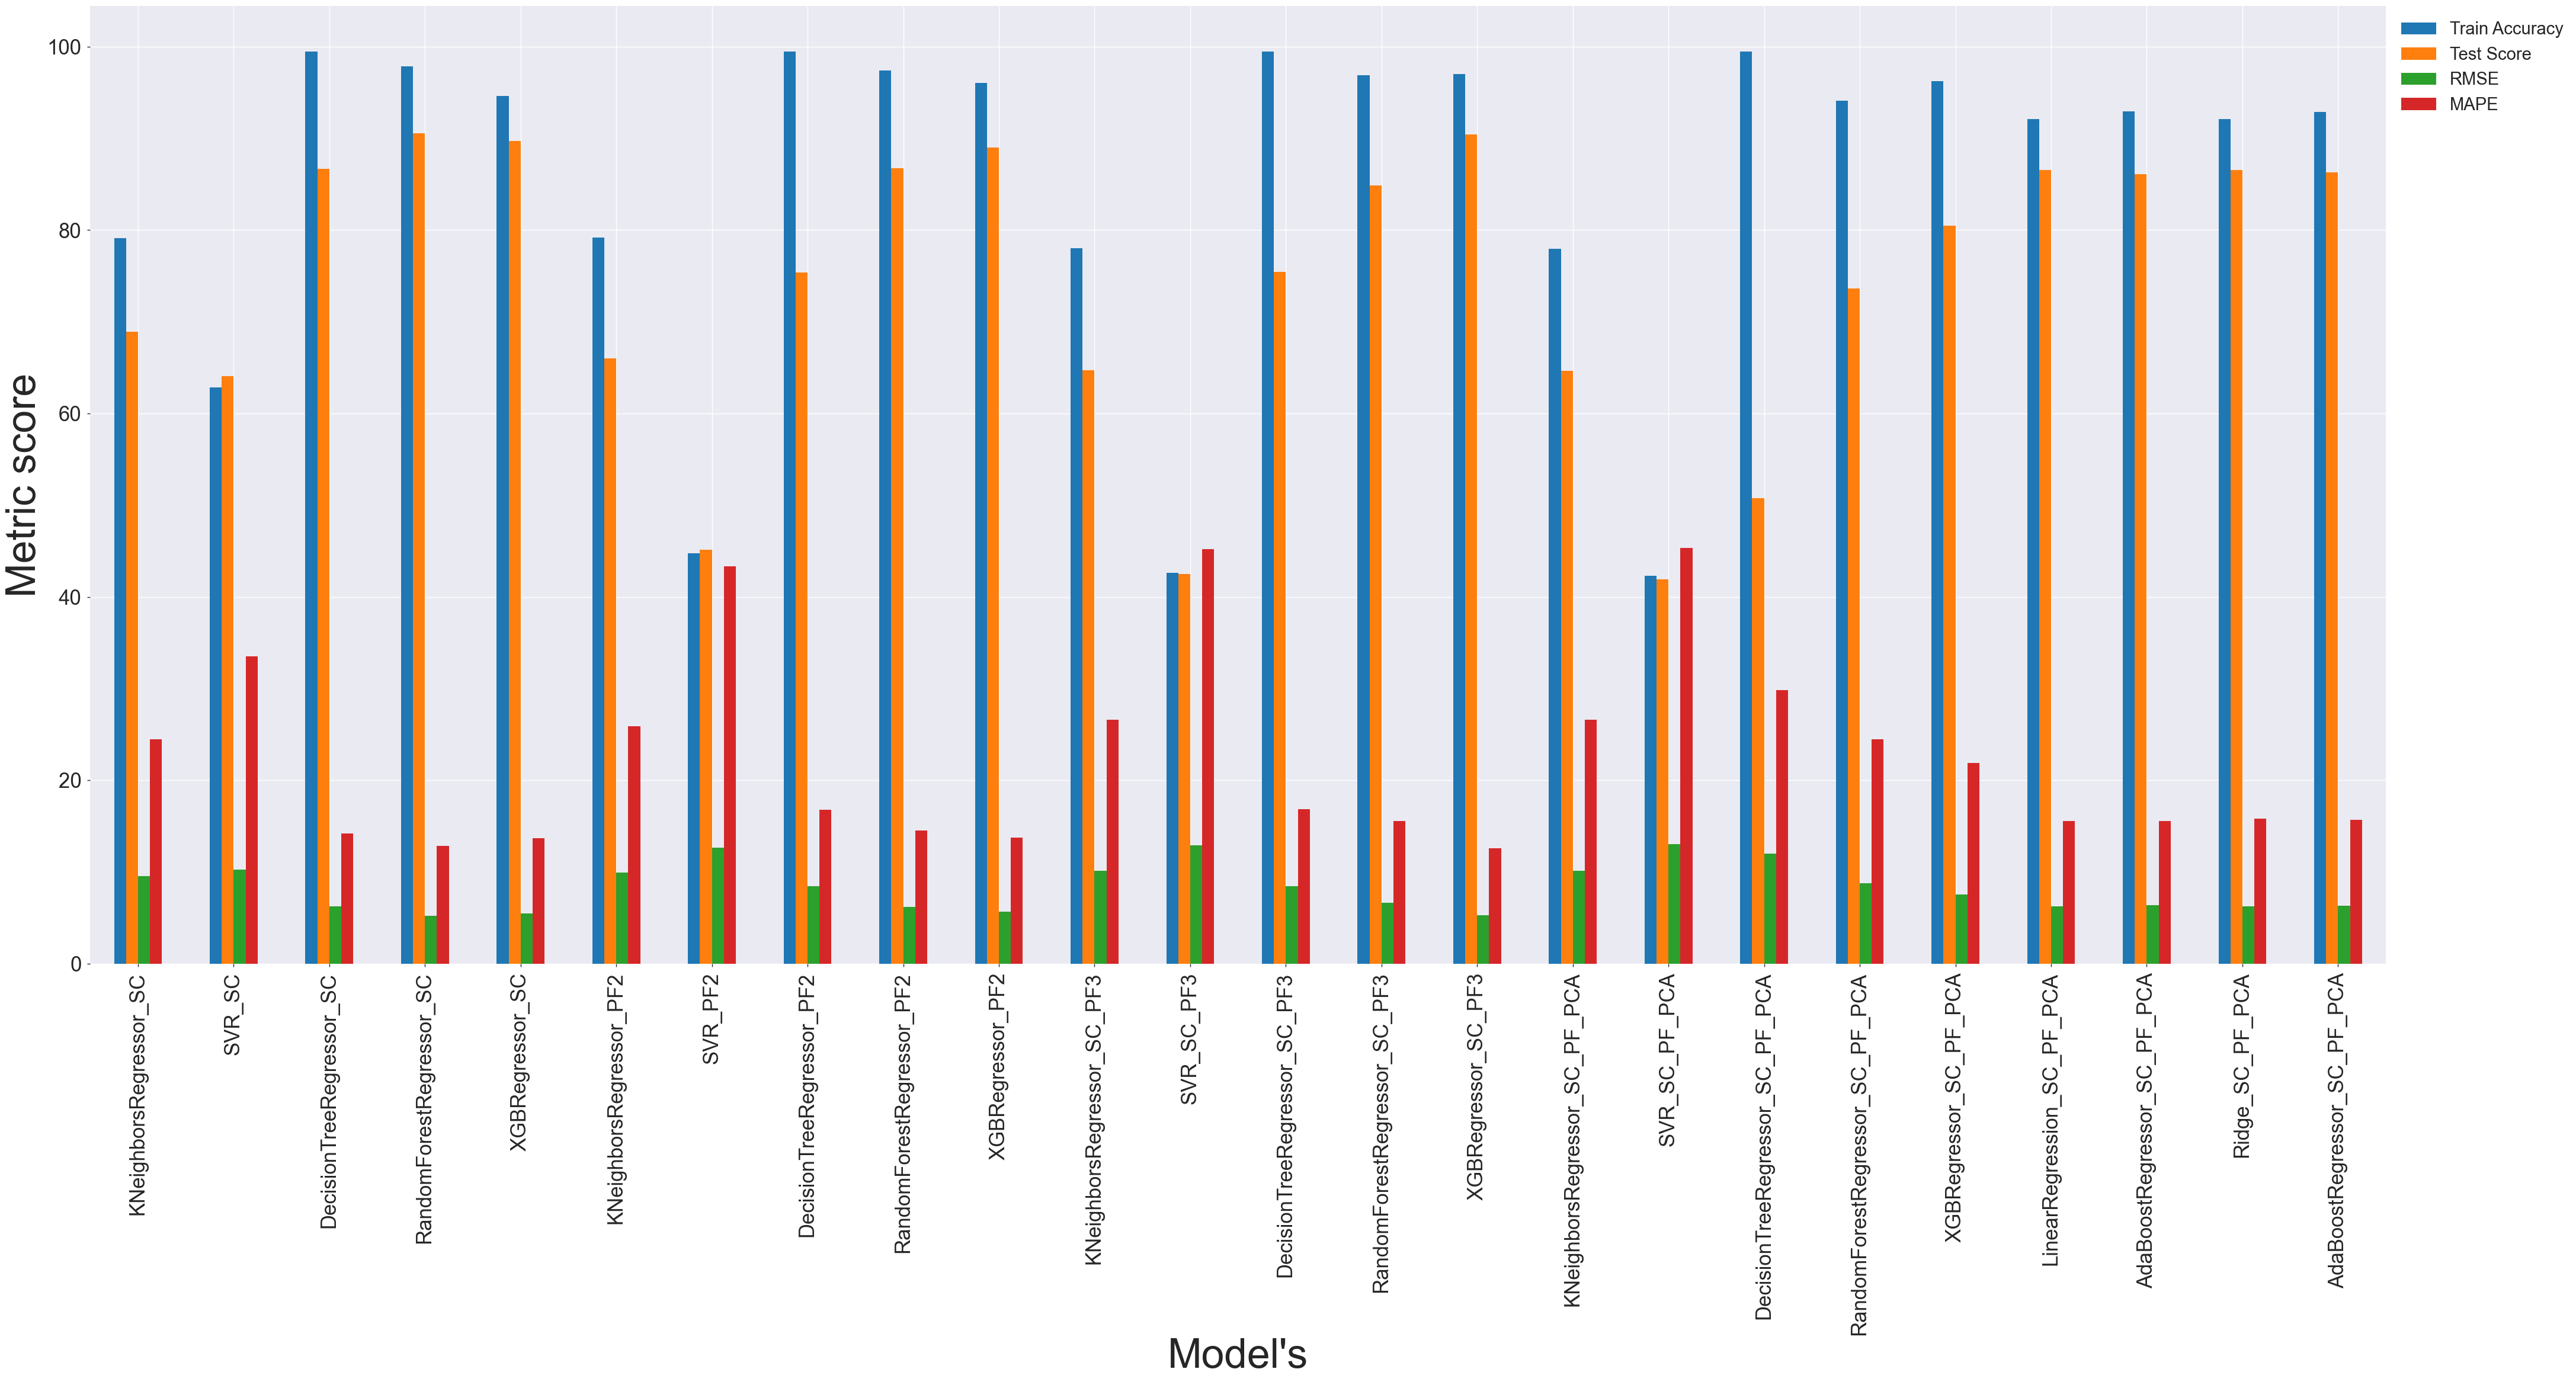

In [79]:
ax = df_metric.plot(kind='bar', figsize = (50,21), fontsize = 25)
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 21})
ax.set_xlabel("Model's", fontsize=50)
ax.set_ylabel("Metric score", fontsize=50)
plt.show()

**Observations**

* **Decision Tree, Random Forest and XGBoost performed very well on Scaled data (without polynomial features and PCA). Metrics on Scaled data is slightly better than data that underwent polynomial features and PCA.**


* **Linear Regression, Ridge and AdaBoost(with underlying LR/Ridge) requires data which underwent Scaling, Polynomial features and PCA to perform equally to DT, RF and XG models. These models are very complex and requires lots of preprocessing. Therefore, Linear regression, Ridge and AdaBoost(with underlying LR/Ridge) will not be considered further.**


* **K-NN and SVR models did not perform well when compared to other models. K-NN and SVR models will not be considered for further steps for Model Tuning.**


* **Decision Tree, Random Forest and XGBoost are going to be considered for Model Tuning.**

## Optimize Model Performance

In [80]:
# Split the data into Train, Validation and Test Set

xtmp1, xtest1, ytmp1, ytest1 = train_test_split(X2, Y2, test_size = 0.20, random_state=1) #outliers handled data is passed as input
xtrain1, xval1, ytrain1, yval1 = train_test_split(xtmp1, ytmp1, test_size = 0.25, random_state=1)

In [81]:
print("Record count in X           : ", X1.count()[1])
print("\nRecord count in Xtrain      : ", xtrain1.count()[1])
print("Record count in Ytrain      : ", ytrain1.count())
print("\nRecord count in XValidation : ", xval1.count()[1])
print("Record count in YValidation : ", yval1.count())
print("\nRecord count in Xtest       : ", xtest1.count()[1])
print("Record count in Ytest       : ", ytest1.count())

Record count in X           :  1030

Record count in Xtrain      :  618
Record count in Ytrain      :  618

Record count in XValidation :  206
Record count in YValidation :  206

Record count in Xtest       :  206
Record count in Ytest       :  206


    * Records were split into 40:20:20 ratio for Train, Validation and Test respectively.

In [82]:
# Scale the xtrain, xvalidation and xtest 
sc = StandardScaler()
xtrain1_sc = sc.fit_transform(xtrain1)
xval1_sc = sc.transform(xval1)
xtest1_sc = sc.transform(xtest1)

In [83]:
# Function with Randomizedsearchcv. This function will be called in further steps
def parm_tune(mod1, parm, nbr_iter, x, y):
    rdmsearch = RandomizedSearchCV(mod1, param_distributions = parm, n_jobs = -1, n_iter = nbr_iter, cv = 7)
    rdmsearch.fit(x, y)
    rd_parms = rdmsearch.best_params_
    rd_score = rdmsearch.best_score_
    return rd_parms

In [84]:
# Function to build using train data and score validation data. This function will be called in further steps
def build_val_model(mod2, xtr, ytr, xval, yval):
    mod2.fit(xtr,ytr)
    TR = mod2.score(xtr,ytr)
    VAL = mod2.score(xval,yval)
    return round(TR*100,2), round(VAL*100,2) 

In [85]:
# Function to build using train data and score validation  and Test data. This function will be called in further steps
def build_test_model(mod2, xtst, ytst):
    TS = mod2.score(xtst,ytst)
    predc = mod2.predict(xtst)
    R2 = metrics.r2_score(ytst,predc) * 100
    RMSE = np.sqrt(metrics.mean_squared_error(ytst,predc))
    MAPE = np.mean(np.abs((ytst - predc) / ytst)) * 100
    return round(TS*100,2), R2, RMSE, MAPE, predc

### Decision Tree - Hyperparameter tuning with RandomizedSearchCV And Review Feature Importances

In [86]:
# With default parameters
DT1 = DecisionTreeRegressor()
TR1, VAL1 = build_val_model(DT1, xtrain1_sc, ytrain1, xval1_sc, yval1)
TS1, R21, RMSE1, MAPE1,Predz = build_test_model(DT1, xtest1_sc, ytest1)
print("Training Score - {}, \nValidation Score - {}, \nTest Score - {}, \nR Square - {}, \nRMSE - {}, \nMAPE- {}" 
      .format(TR1, VAL1, TS1, R21, RMSE1, MAPE1))

Training Score - 99.86, 
Validation Score - 84.26, 
Test Score - 80.52, 
R Square - 80.52333866567699, 
RMSE - 7.573161327471466, 
MAPE- 18.69037497653558


Decision Tree with default parameters overfits the data. 

In [87]:
print (pd.DataFrame(DT1.feature_importances_, columns = ["Feature Importances"], index = xtrain1.columns))

              Feature Importances
cement                   0.384521
slag                     0.104603
ash                      0.013479
water                    0.125649
superplastic             0.022030
coarseagg                0.017937
fineagg                  0.027136
age                      0.304646


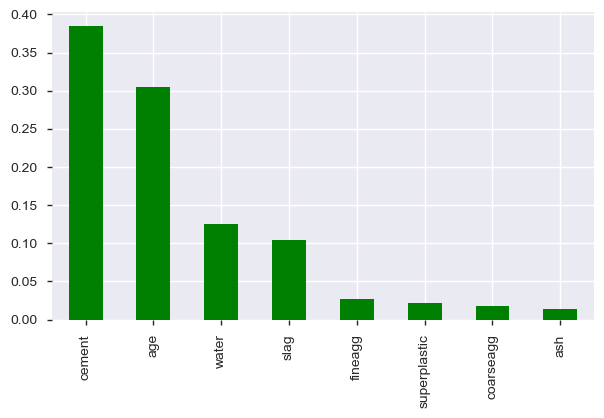

In [338]:
feat_importances = pd.Series(DT1.feature_importances_, index=xtrain1.columns)
plt.figure(figsize=(7,4))
feat_importances.nlargest(8).plot(kind='bar',color="green")

**Feature Importances of Decision Tree**
    * Cement and Age have the highest influence on target variable (Strength).
    * Water and Slag have the second highest influence on target variable (Strength).
    * Ash has the lowest influence on target variable (Strength).

In [129]:
#Tuning of Decision Tree Regressor. This step has been run multiple times with different parameter values

DTR = DecisionTreeRegressor()
hyperparm1 = {'criterion':["mse", "friedman_mse", "mae"],'max_depth': sp_randint(3, 12), 'max_features': sp_randint(2, 8)}

DTR_parms = parm_tune(DTR, hyperparm1, 10, xtrain1_sc, ytrain1)
print("Best Parameters Identified: \n", DTR_parms)

Best Parameters Identified: 
 {'criterion': 'mse', 'max_depth': 9, 'max_features': 5}


C:\Softwares\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


“mse” denotes mean squared error -> Measures the quality of split.

In [135]:
# This step has been ran multiple times to evaluate validation score
DTR = DecisionTreeRegressor(criterion="mse", max_depth=9, max_features=5)
DT_TR1, DT_VAL1 = build_val_model(DTR, xtrain1_sc, ytrain1, xval1_sc, yval1)
print("Training Score - {}, \nValidation Score - {}" 
      .format(DT_TR1, DT_VAL1))

Training Score - 96.75, 
Validation Score - 87.45


Earlier model was overfit with 100% Training accuracy. With hyperparameters, model is not overfit.

In [136]:
# This step has been ran once to evaluate test score.
DT_TS1, DT_R21, DT_RMSE1, DT_MAPE1, DT_PRED1 = build_test_model(DTR, xtest1_sc, ytest1)
print("\nR Square(Test Score) - {}, \nRMSE - {}, \nMAPE- {}" 
      .format(DT_R21, DT_RMSE1, DT_MAPE1))


R Square(Test Score) - 81.80701389936694, 
RMSE - 7.319340411438439, 
MAPE- 17.206722334964404


    R-Squared, RMSE and MAPE metrics are improved with hyperparameters tuning. 

In [137]:
print (pd.DataFrame(DTR.feature_importances_, columns = ["Feature Importances"], index = xtrain1.columns))

              Feature Importances
cement                   0.297304
slag                     0.090125
ash                      0.028344
water                    0.172125
superplastic             0.036993
coarseagg                0.020963
fineagg                  0.027581
age                      0.326564


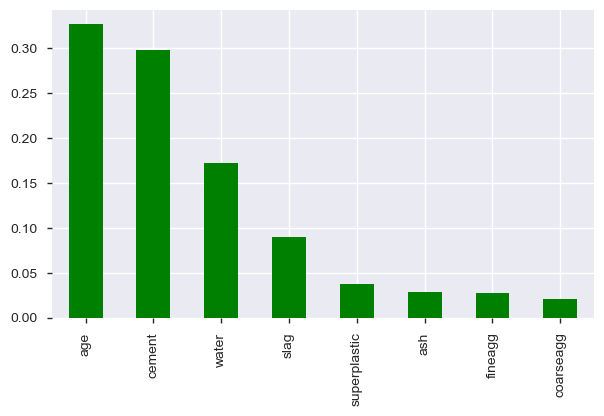

In [339]:
feat_importances = pd.Series(DTR.feature_importances_, index=xtrain1.columns)
plt.figure(figsize=(7,4))
feat_importances.nlargest(8).plot(kind='bar',color="green")

    There is no significant difference in feature importances. Similar to the above observation -
        * Cement and Age have the highest influence on target variable (Strength).
        * Water and Slag have the second highest influence on target variable (Strength).
        * Ash has the lowest influence on target variable (Strength).

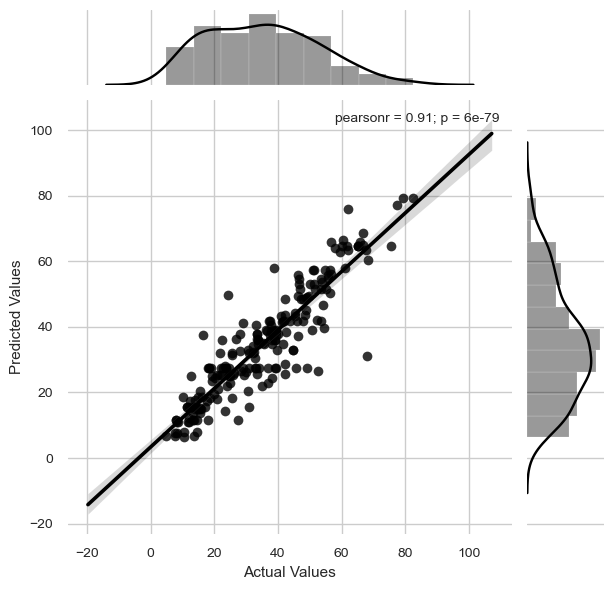

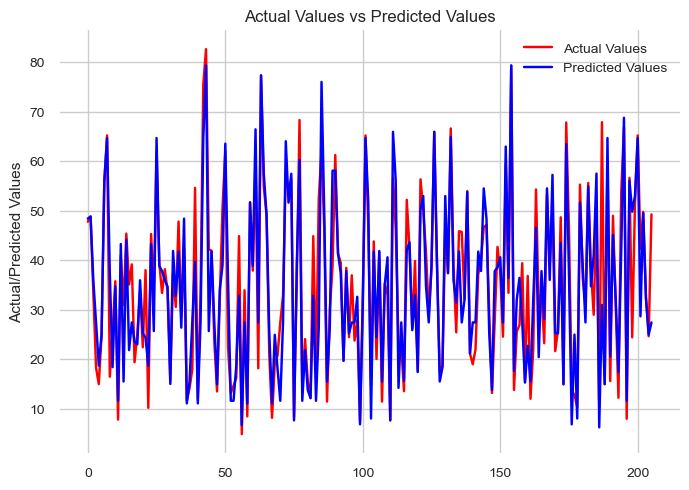

In [348]:
with sns.axes_style("whitegrid"):
    sns.jointplot(x=ytest1, y=DT_PRED1, kind="reg", color="k").annotate(stats.pearsonr)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()
with sns.axes_style("whitegrid"):
    plt.plot(np.arange(206), ytest1,color='r', label="Actual Values")
    plt.plot(np.arange(206), DT_PRED1,color='b', label="Predicted Values")
    plt.legend(loc="best")
    plt.ylabel("Actual/Predicted Values")
    plt.title("Actual Values vs Predicted Values")
    plt.show()

**There is a very good correlation between Actual values and predicted values (by Decision Tree). Jointplot shows a significant overlap between Actual and Predicted values.**  

In [139]:
# stats.pearsonr provides the correlation coefficient between Actual and predicted values.
DT_coeff = round(stats.pearsonr(ytest1, y=DT_PRED1)[0] * 100, 2) #multiplied by 100 for better visualization at later stages
DT_coeff

90.79

### Random Forest - Hyperparameter tuning with RandomizedSearchCV And Review Feature Importances

In [220]:
# With default parameters
RF1 = RandomForestRegressor()
TR1, VAL1 = build_val_model(RF1, xtrain1_sc, ytrain1, xval1_sc, yval1)
TS1, R21, RMSE1, MAPE1, Predz = build_test_model(RF1, xtest1_sc, ytest1)
print("Training Score - {}, \nValidation Score - {}, \nTest Score - {}, \nR Square - {}, \nRMSE - {}, \nMAPE- {}" 
      .format(TR1, VAL1, TS1, R21, RMSE1, MAPE1))

Training Score - 97.38, 
Validation Score - 87.2, 
Test Score - 87.09, 
R Square - 87.08577366187515, 
RMSE - 6.166718853666555, 
MAPE- 14.619376939027145


Random Forest with default parameters delivers good metrics.

In [221]:
print (pd.DataFrame(RF1.feature_importances_, columns = ["Feature Importances"], index = xtrain1.columns))

              Feature Importances
cement                   0.305783
slag                     0.061058
ash                      0.020176
water                    0.130854
superplastic             0.061267
coarseagg                0.030545
fineagg                  0.051093
age                      0.339224


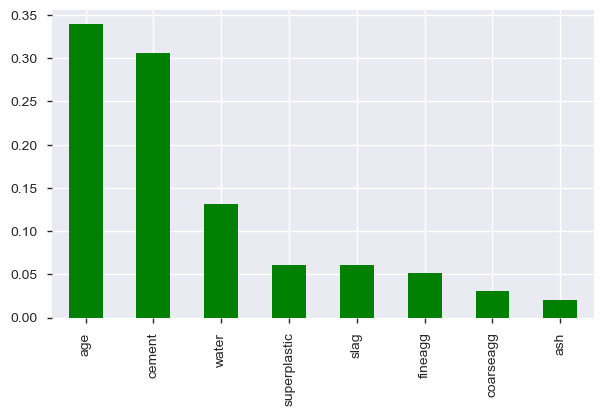

In [340]:
feat_importances = pd.Series(RF1.feature_importances_, index=xtrain1.columns)
plt.figure(figsize=(7,4))
feat_importances.nlargest(8).plot(kind='bar',color="green")

**Feature Importances of Random Forest**
    * Cement and Age have the highest influence on target variable (Strength).
    * Water has the second highest influence on target variable (Strength).
    * In Decision Tree, Slag had good influence.

In [202]:
#Tuning of Random Forest Regressor. This step has been run multiple times with different parameter values

RFR = RandomForestRegressor()
hyperparm1 = {'n_estimators': [150,175,200,225],'criterion':["mse", "mae"],'max_depth':sp_randint(3,17)}
              #'max_features': sp_randint(2, 8)}

RFR_parms = parm_tune(RFR, hyperparm1, 10, xtrain1_sc, ytrain1)
print("Best Parameters Identified: \n", RFR_parms)

Best Parameters Identified: 
 {'criterion': 'mae', 'max_depth': 14, 'n_estimators': 200}


In [205]:
# This step has been ran multiple times to evaluate validation score
RFR = RandomForestRegressor(n_estimators=200, criterion='mae', max_depth=14)

RF_TR1, RF_VAL1 = build_val_model(RFR, xtrain1_sc, ytrain1, xval1_sc, yval1)
print("Training Score - {}, \nValidation Score - {}" 
      .format(RF_TR1, RF_VAL1))

Training Score - 98.33, 
Validation Score - 90.53


**Random forest is neither overfit nor underfit.**

In [206]:
# This step has been ran once to evaluate test score.
RF_TS1, RF_R21, RF_RMSE1, RF_MAPE1, RF_PRED1 = build_test_model(RFR, xtest1_sc, ytest1)
print("\nR Square(Test Score) - {}, \nRMSE - {}, \nMAPE- {}" 
      .format(RF_R21, RF_RMSE1, RF_MAPE1))


R Square(Test Score) - 90.46095593321228, 
RMSE - 5.299957410256616, 
MAPE- 13.330358121395665


R-Squared, RMSE and MAPE metrics are improved with hyperparameters tuning. 

In [222]:
print (pd.DataFrame(RFR.feature_importances_, columns = ["Feature Importances"], index = xtrain1.columns))

              Feature Importances
cement                   0.254885
slag                     0.089434
ash                      0.042965
water                    0.120721
superplastic             0.087981
coarseagg                0.062618
fineagg                  0.084786
age                      0.256611


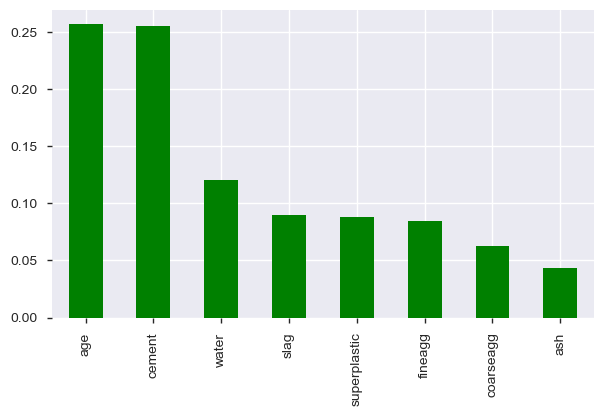

In [341]:
feat_importances = pd.Series(RFR.feature_importances_, index=xtrain1.columns)
plt.figure(figsize=(7,4))
feat_importances.nlargest(8).plot(kind='bar',color="green")

Feature importance of tuned RF model is similar to RF model trained with default parameters

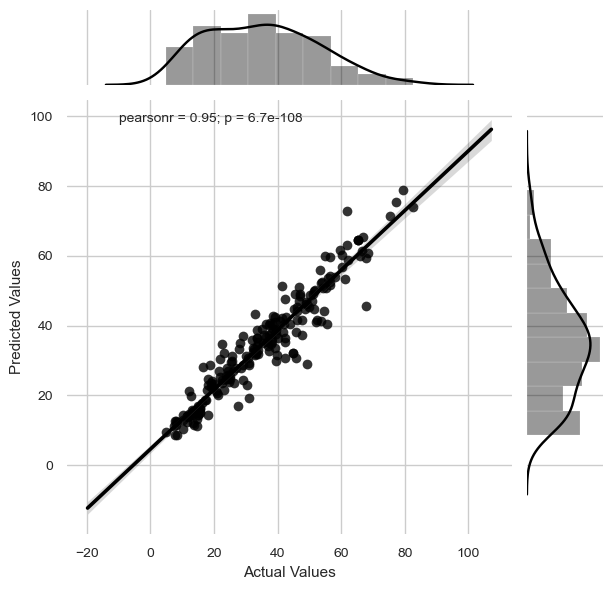

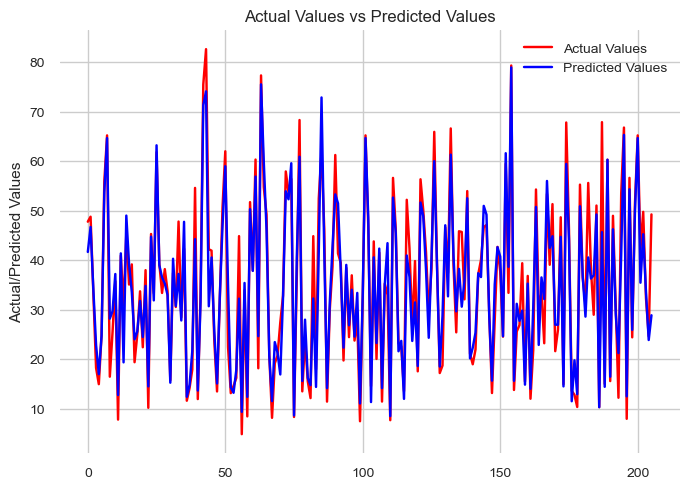

In [349]:
with sns.axes_style("whitegrid"):
    sns.jointplot(x=ytest1, y=RF_PRED1, kind="reg", color="k").annotate(stats.pearsonr)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()
with sns.axes_style("whitegrid"):
    plt.plot(np.arange(206), ytest1,color='r', label="Actual Values")
    plt.plot(np.arange(206), RF_PRED1,color='b', label="Predicted Values")
    plt.legend(loc="best")
    plt.ylabel("Actual/Predicted Values")
    plt.title("Actual Values vs Predicted Values")
    plt.show()

**There is an impressive correlation between Actual values and predicted values (by Random Forest). Jointplot shows a significant overlap between Actual and Predicted values.**  

In [224]:
# stats.pearsonr provides the correlation coefficient between Actual and predicted values.
RF_coeff = round(stats.pearsonr(ytest1, y=RF_PRED1)[0] * 100, 2) #multiplied by 100 for better visualization at later stages
RF_coeff

95.32

### XGBoost - Hyperparameter tuning with RandomizedSearchCV And Review Feature Importances

In [225]:
# With default parameters
XG1 = XGBRegressor()
TR1, VAL1 = build_val_model(XG1, xtrain1_sc, ytrain1, xval1_sc, yval1)
TS1, R21, RMSE1, MAPE1, Predz = build_test_model(RF1, xtest1_sc, ytest1)
print("Training Score - {}, \nValidation Score - {}, \nTest Score - {}, \nR Square - {}, \nRMSE - {}, \nMAPE- {}" 
      .format(TR1, VAL1, TS1, R21, RMSE1, MAPE1))

[19:12:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score - 95.03, 
Validation Score - 91.05, 
Test Score - 87.09, 
R Square - 87.08577366187515, 
RMSE - 6.166718853666555, 
MAPE- 14.619376939027145


XGB with default parameters delivers good metrics. Neither overfit nor underfit

In [226]:
print (pd.DataFrame(XG1.feature_importances_, columns = ["Feature Importances"], index = xtrain1.columns))

              Feature Importances
cement                   0.235095
slag                     0.091063
ash                      0.049076
water                    0.108034
superplastic             0.124215
coarseagg                0.021847
fineagg                  0.050590
age                      0.320079


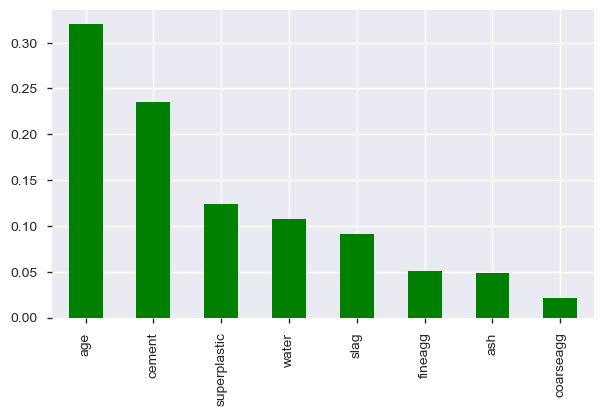

In [342]:
feat_importances = pd.Series(XG1.feature_importances_, index=xtrain1.columns)
plt.figure(figsize=(7,4))
feat_importances.nlargest(8).plot(kind='bar',color="green")

**Feature Importances of XGB**
    * Cement and Age have the highest influence on target variable (Strength).
    * Superplastic has the second highest influence on target variable (Strength). It was not in top two for other models.
    * Water and Slag have good influence on target variable (Strength).

In [249]:
#Tuning of XGB Regressor. This step has been run multiple times with different parameter values

XGR = XGBRegressor(n_jobs = -1) # to use maximum threads
hyperparm1 = {'n_estimators': [100,150,200,250],'criterion':["mse", "mae"],'max_depth':sp_randint(2, 5)}
              #'gamma': np.arange(2,5)}

XGR_parms = parm_tune(XGR, hyperparm1, 10, xtrain1_sc, ytrain1)
print("Best Parameters Identified: \n", XGR_parms)

[19:16:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Parameters Identified: 
 {'criterion': 'mae', 'max_depth': 4, 'n_estimators': 200}


In [250]:
# This step has been ran multiple times to evaluate validation score
XGR = XGBRegressor(n_estimators=200, criterion='mae', max_depth=4)

XG_TR1, XG_VAL1 = build_val_model(XGR, xtrain1_sc, ytrain1, xval1_sc, yval1)
print("Training Score - {}, \nValidation Score - {}" 
      .format(XG_TR1, XG_VAL1))

[19:16:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score - 98.76, 
Validation Score - 92.98


In [251]:
# This step has been ran once to evaluate test score.
XG_TS1, XG_R21, XG_RMSE1, XG_MAPE1, XG_PRED1 = build_test_model(XGR, xtest1_sc, ytest1)
print("\nR Square(Test Score) - {}, \nRMSE - {}, \nMAPE- {}" 
      .format(XG_R21, XG_RMSE1, XG_MAPE1))


R Square(Test Score) - 92.7572632237835, 
RMSE - 4.618184752614243, 
MAPE- 11.740176922098746


**Significant increase in metrics after Hyperparameter tuning.** 

In [252]:
print (pd.DataFrame(XGR.feature_importances_, columns = ["Feature Importances"], index = xtrain1.columns))

              Feature Importances
cement                   0.247933
slag                     0.119018
ash                      0.036472
water                    0.127834
superplastic             0.089090
coarseagg                0.022394
fineagg                  0.058743
age                      0.298516


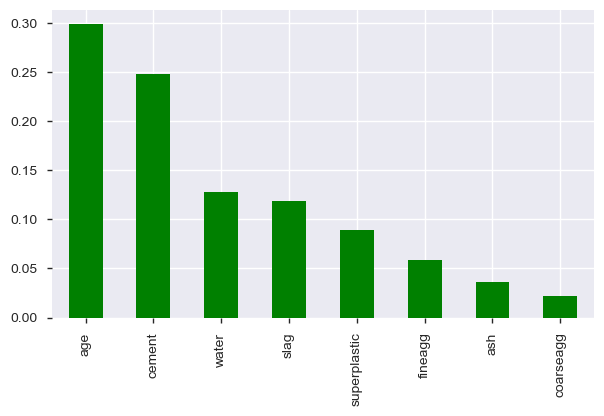

In [343]:
feat_importances = pd.Series(XGR.feature_importances_, index=xtrain1.columns)
plt.figure(figsize=(7,4))
feat_importances.nlargest(8).plot(kind='bar',color="green")

Feature importance of tuned XGB model is similar to XGB model trained with default parameters

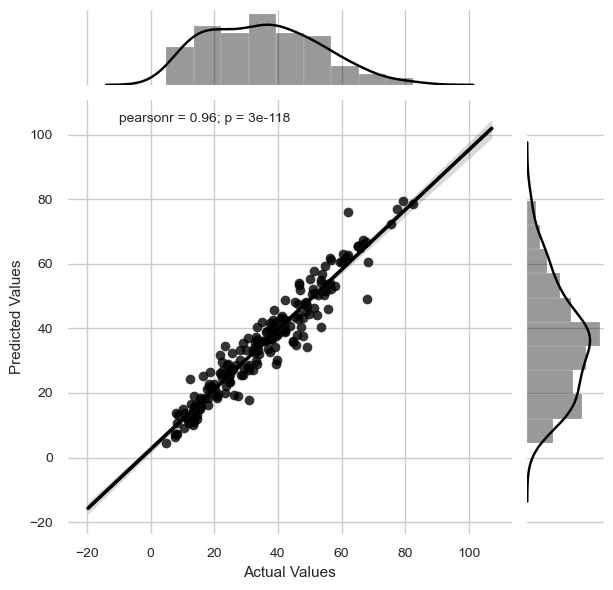

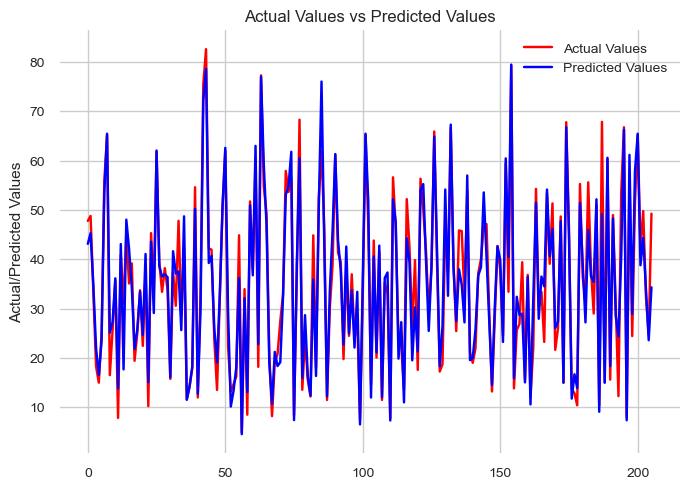

In [350]:
with sns.axes_style("whitegrid"):
    sns.jointplot(x=ytest1, y=XG_PRED1, kind="reg", color="k").annotate(stats.pearsonr)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()
with sns.axes_style("whitegrid"):
    plt.plot(np.arange(206), ytest1,color='r', label="Actual Values")
    plt.plot(np.arange(206), XG_PRED1,color='b', label="Predicted Values")
    plt.legend(loc="best")
    plt.ylabel("Actual/Predicted Values")
    plt.title("Actual Values vs Predicted Values")
    plt.show()

**There is an impressive correlation between Actual values and predicted values (by XGB). Jointplot shows a significant overlap between Actual and Predicted values.**  

In [254]:
# stats.pearsonr provides the correlation coefficient between Actual and predicted values.
RF_coeff = round(stats.pearsonr(ytest1, y=XG_PRED1)[0] * 100, 2) #multiplied by 100 for better visualization at later stages
RF_coeff

96.31

## Models comparison - DT, RF and XGB

### Comparison of Training, Validation and Test Scores

In [256]:
# Loading the values in a dataframe

mod_dict1 = {'Model': ['Decision Tree', 'Random Forest', 'XGBoost'], 
     'Training Score':[DT_TR1, RF_TR1, XG_TR1], 
     'Validation Score':[DT_VAL1, RF_VAL1, XG_VAL1], 
     'Test Score': [DT_R21, RF_R21, XG_R21]}
     
df_mod1 = pd.DataFrame(mod_dict1)

df_mod1 = df_mod1.set_index('Model')
df_mod1

Training Score  Validation Score  Test Score
Model                                                      
Decision Tree           96.75             87.45   81.807014
Random Forest           98.33             90.53   90.460956
XGBoost                 98.76             92.98   92.757263

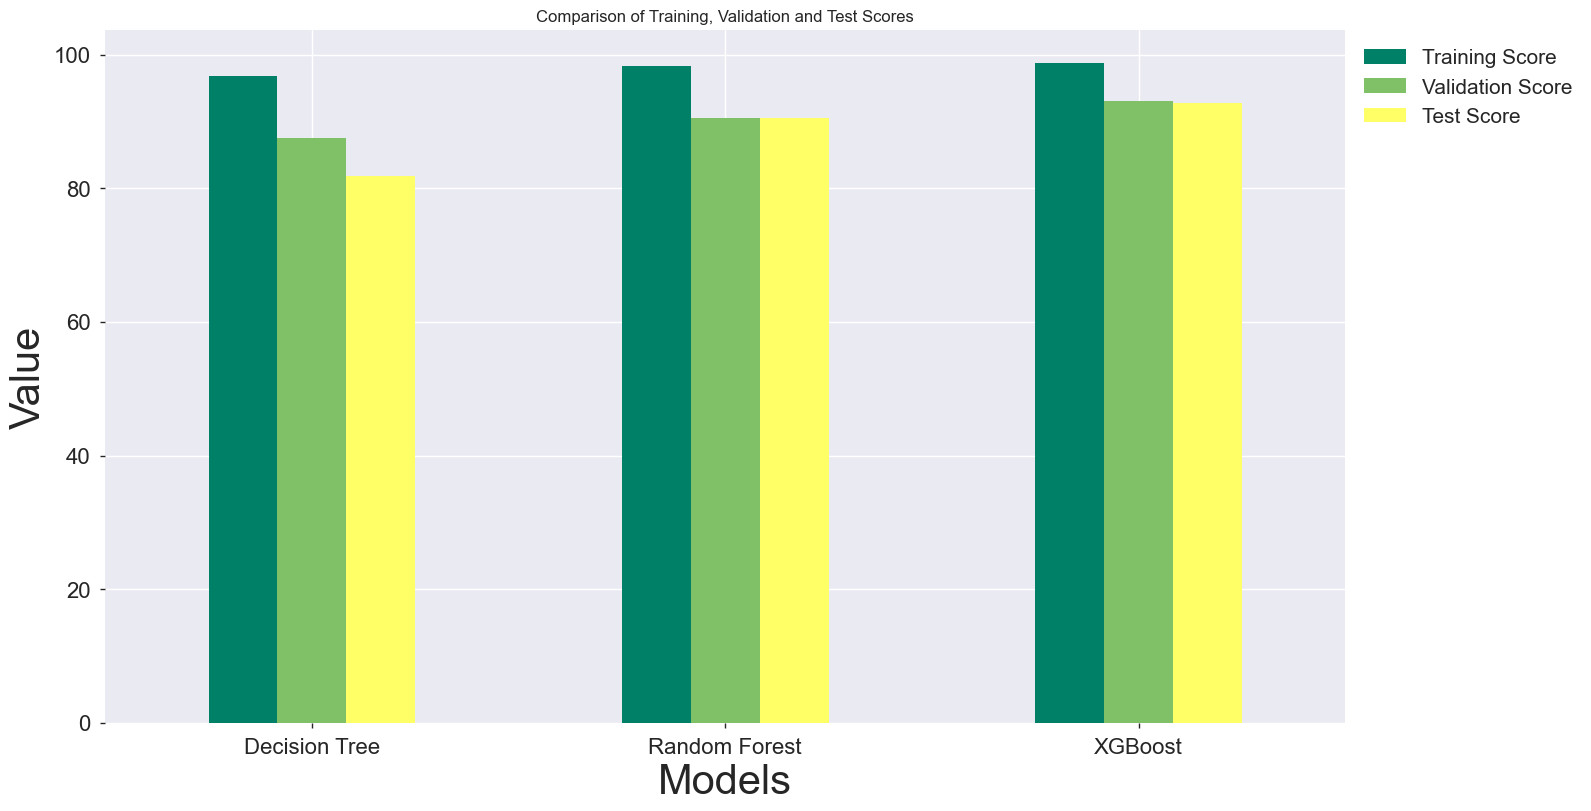

In [272]:
# Plot the bar chart

ax2 = df_mod1.plot(kind='bar', rot=0, figsize = (16,9), fontsize = 16,colormap='summer',
                  title="Comparison of Training, Validation and Test Scores")
ax2.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
ax2.set_ylabel("Value", fontsize=30)
ax2.set_xlabel("Models", fontsize=30)
plt.show()

**XGBoost has the highest Validation and Test score, followed by Random Forest and Decision Tree.**

### Comparison of RMSE and MAPE

In [273]:
# Loading the values in a dataframe

mod_dict2 = {'Model': ['Decision Tree', 'Random Forest', 'XGBoost'], 
     'Root Mean Squared Error':[DT_RMSE1, RF_RMSE1, XG_RMSE1], 
     'Mean Absolute Percentage Error':[DT_MAPE1, RF_MAPE1, XG_MAPE1]}
     
df_mod2 = pd.DataFrame(mod_dict2)

df_mod2 = df_mod2.set_index('Model')
df_mod2

Root Mean Squared Error  Mean Absolute Percentage Error
Model                                                                 
Decision Tree                 7.319340                       17.206722
Random Forest                 5.299957                       13.330358
XGBoost                       4.618185                       11.740177

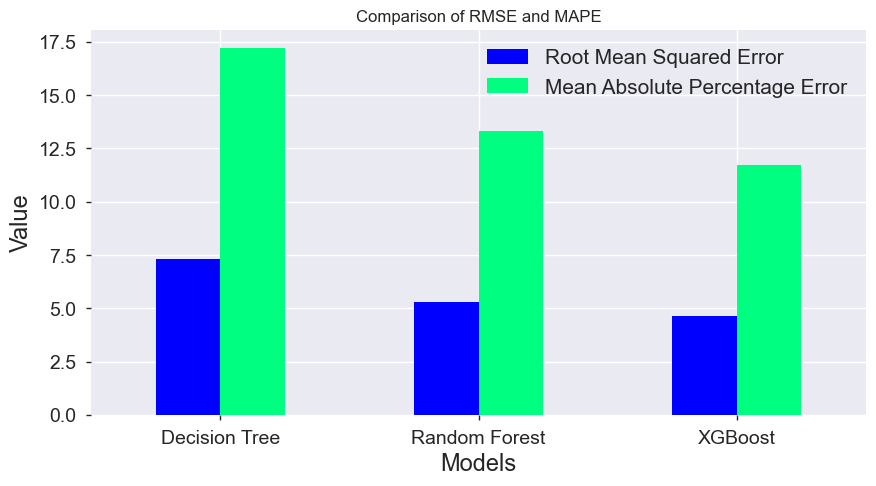

In [280]:
# Plot the bar chart

ax2 = df_mod2.plot(kind='bar', rot=0, figsize = (10,5), fontsize = 14,colormap='winter',
                  title="Comparison of RMSE and MAPE")
ax2.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
ax2.set_ylabel("Value", fontsize=17)
ax2.set_xlabel("Models", fontsize=17)
plt.show()

**Lower the RMSE and MAPE are, the better the models are. XGBoost has the best RMSE and MAPE, followed by Random Forest and Decision Tree.**

**XGBoost has the best 95% confidence range, followed by Random Forest and Decision Tree.**

## Conclusion

The assignment is to build a model to predict the strength of concrete based on independent features cement, blast, fly ash, water, super plasticizer, coarse aggregate, fine aggregate and age.

**Points to consider -** 

1) Multiple models were built in this assignment - Linear Regression, Ridge, Lasso, K-NN, SVR, Decision Tree, Random Forest,  AdaBoost regressor (with underlying Ridge and Linear Regression models) and XGBoost regressor.

2) Clustering has been attempted on this dataset. Clustering is unsuccessful since there is too much overlap in data between clusters. Therefore, separate models for each cluster was not built.

3) Before building models, univariate and bivariate analysis were performed. And outliers were removed. 

4) Models K-NN, SVR, Lasso did not perform well on this dataset. 

5) Linear Regression, Ridge and AdaBoost regressor (with underlying Ridge and Linear Regression models) models performed very well on the data that underwent Scaling, Polynomial Features and PCA. 

6) Ensemble models Decision Tree, Random Forest and XGBoost performed very well on Scaled data. Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE) metrics are impressive.

7) XGBoost regressor has the best model performance at 95% confidence level. 

**Final Words -** 

Though the metrics of Linear Regression, Ridge and AdaBoost regressor are impressive, complexity of the models are very high as the data required to undergo Scaling, Polynomial Features and PCA. Higher complexity will cause expensive computation, and therefore these models will not be considered to be migrated to production.

R Squared metic is almost equal for Ensemble models Decision Tree, Random Forest and XGBoost regressor. However, Random Forest and XGB have better RMSE and MAPE metic than Decision Tree. Out of final two models (Random Forest and XGB Regressor), XGB has the best RMSE and MAPE, which means Error in predictions is very less when compared to other models. In addition, XGB has the best model performance at 95% confidence level. 

**Therefore, XGB regressor outperforms other models in predicting the Strength of the concrete.**